# Machine learning - Análise fraude cartão credito

![](img/1353.jpg)

<a href="https://br.freepik.com/vetores-gratis/pagina-de-destino-isometrica-de-seguranca-de-cartao-de-credito-robo_7588634.htm#query=machine%20learning%20credit&position=35&from_view=search&track=ais&uuid=f564bf38-b380-4976-b5b7-ef8c82b91fa6">Imagem de upklyak</a> no Freepik

In [1]:
# Importação das bibliotecas 

# Bibliotecas sistema
import re
import unicodedata
import itertools

# Biblioteca para manipulação de arquivos
import pandas as pd
import numpy as np 

# Visualização de dados
import plotly
import seaborn as sns
import matplotlib.pylab as pl
import matplotlib as m
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib import pyplot as plt

# Configuração para os gráficos largura e layout dos graficos
sns.set_theme(style='whitegrid')
palette='viridis'

plt.rcParams["figure.figsize"] = (20, 10)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
m.rcParams['axes.labelsize'] = 15
m.rcParams['xtick.labelsize'] = 15
m.rcParams['ytick.labelsize'] = 15
m.rcParams['text.color'] = 'k'

# Warnings retirar alertas 
import warnings
warnings.filterwarnings("ignore")

# Versão do python
from platform import python_version
print()
print('Versão python neste Jupyter Notebook:', python_version())
print()

# Carregar as versões das bibliotecas
import watermark

# Versões das bibliotecas
%reload_ext watermark
%watermark -a "Versões das bibliotecas" --iversions


Versão python neste Jupyter Notebook: 3.8.18

Author: Versões das bibliotecas

plotly    : 5.18.0
seaborn   : 0.12.2
re        : 2.2.1
numpy     : 1.24.4
watermark : 2.4.3
matplotlib: 3.6.0
pandas    : 1.5.3



# Dataset

In [2]:
# Carregando dataset
data = pd.read_csv("creditcard.csv")
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [3]:
# Visualizando 5 primeiros dados
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# Visualizando os 5 últimos dados
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,-1.040458,-0.031513,-0.188093,-0.084316,0.041333,-0.302620,-0.660377,0.167430,-0.256117,0.382948,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [5]:
# Visualizando linhas e colunas 
data.shape

(284807, 31)

In [6]:
# Info dados
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Durante a exposição das informações iniciais de cada variável, pudemos identificar aspectos cruciais da amostra. Observamos que, aparentemente, não há dados faltantes na análise. Além disso, constatamos que todas as variáveis numéricas foram devidamente reconhecidas como float, o que sugere uma qualidade consistente e confiável nos dados disponíveis para análise.

Ao analisar as informações iniciais de cada variável, observamos que aparentemente não há dados faltantes na amostra. Além disso, todas as variáveis numéricas foram corretamente identificadas como float, demonstrando a qualidade e integridade dos dados disponíveis para análise.

In [7]:
# Visualizando dados estatisticos com função T
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [8]:
# Visualizando dados estatisticos
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,1.673327e-15,-1.247012e-15,8.190001e-16,1.207294e-15,4.887456e-15,1.437716e-15,-3.772171e-16,9.564149e-16,1.039917e-15,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Durante a observação inicial, notamos que o conjunto de dados contém quase 285 mil transações, proporcionando uma base substancial para análise. Além disso, destacamos que o valor médio das transações é de aproximadamente 88 dólares, fornecendo um panorama inicial do padrão de gastos ou transações presentes no conjunto de dados.

In [9]:
# Verificando existência de elementos nulos e NaNs
data.isna().sum().max()
data.isnull().sum().max()

0

# 1.Análise exploratoria dados

Durante a análise, verificamos a inexistência de elementos nulos ou do tipo NaN nos dados. Essa constatação é significativa, pois nos isenta da necessidade de substituir esses valores ausentes por medidas alternativas, como a mediana, por exemplo. Esta qualidade dos dados nos permite avançar diretamente para etapas subsequentes da análise sem a etapa de imputação de valores faltantes.

Determinamos a quantidade de transações presentes nos dados, classificando-as entre aquelas identificadas como fraudulentas e não fraudulentas. Essa segmentação nos permite uma compreensão mais aprofundada da distribuição dessas transações e fornece insights valiosos sobre a incidência de fraudes dentro do conjunto de dados analisado.

In [10]:
print('Transacoes sem fraude:', data['Class'].value_counts()[0])
print('Transacoes com fraude:', data['Class'].value_counts()[1])
print()
print('Transacoes sem fraude:', round(data['Class'].value_counts()[0]/len(data) * 100,2), '% da amostra simples')
print('Transacoes com fraude:', round(data['Class'].value_counts()[1]/len(data) * 100,2), '% da amostra simples')

Transacoes sem fraude: 284315
Transacoes com fraude: 492

Transacoes sem fraude: 99.83 % da amostra simples
Transacoes com fraude: 0.17 % da amostra simples


Analisando o conjunto de transações registrado, identificamos que apenas 492 foram categorizadas como fraudulentas, representando meramente 0,17% do total da amostra. Essa constatação evidencia um desequilíbrio significativo nos dados, onde a incidência de fraudes é consideravelmente baixa em comparação com as transações não fraudulentas. Este desbalanceamento impacta diretamente na modelagem e pode requerer técnicas específicas para lidar com essa disparidade durante a construção do modelo de aprendizado de máquina.

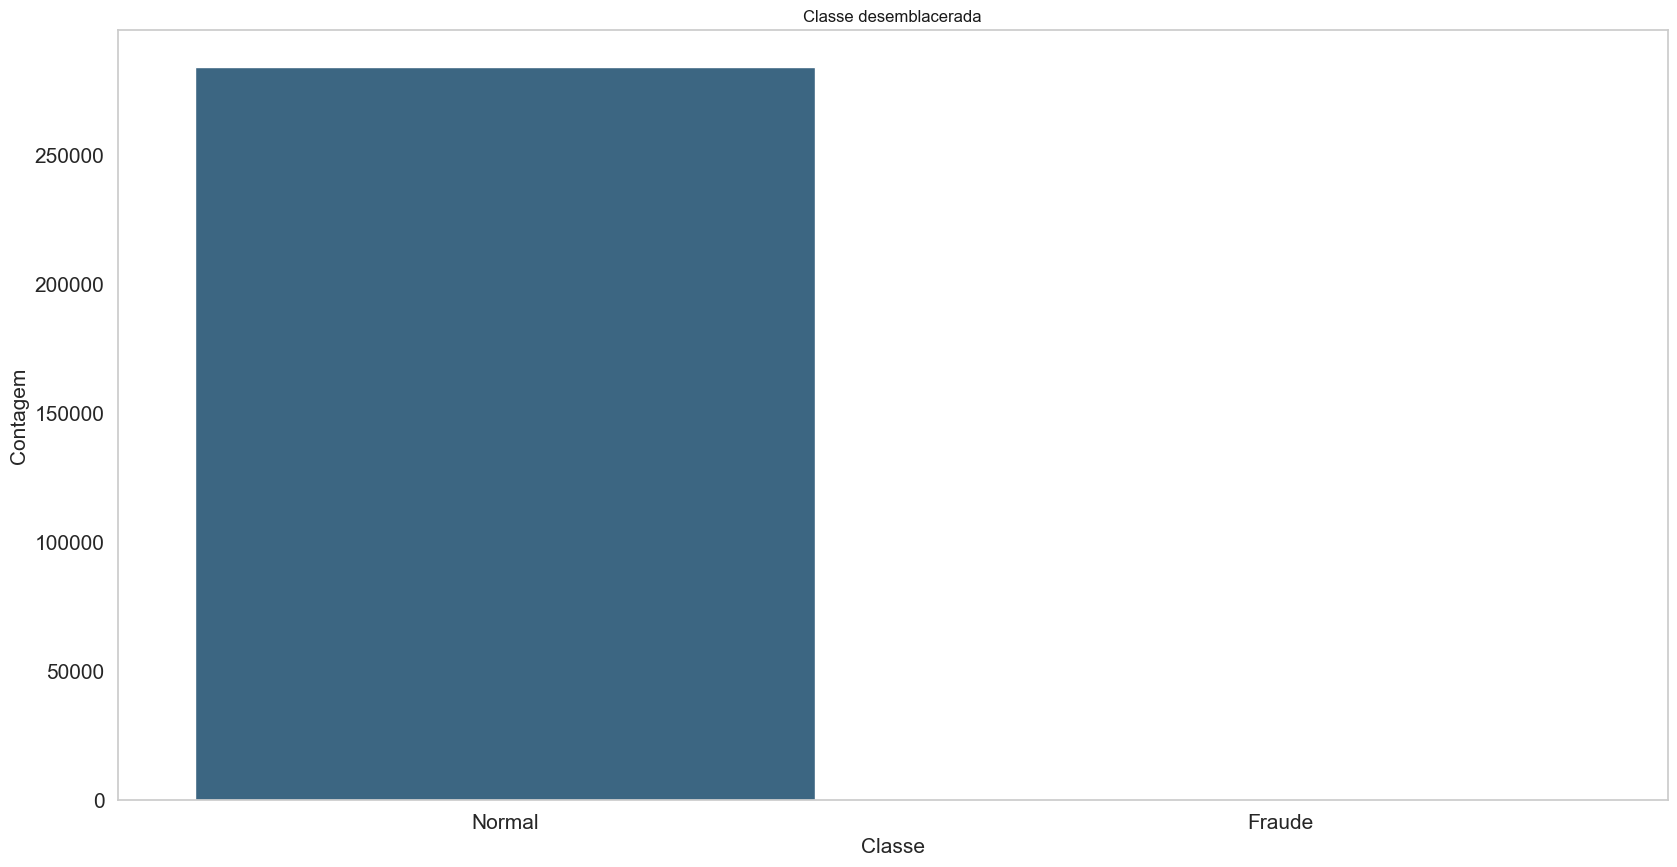

In [11]:
# Função para converter a variável binária classe para string
def ana_fraud(data):
    if (data == 0):
        return "Normal"
    else:
        return "Fraude"

# Copy dados
data_temp = data.copy()
data_temp["Class"] = data_temp["Class"].apply(ana_fraud)

# Gráfico barra
sns.countplot(data_temp, x="Class", palette='viridis')
plt.xlabel('Classe')
plt.ylabel('Contagem')
plt.title("Classe desemblacerada")
plt.grid(False)
del data_temp

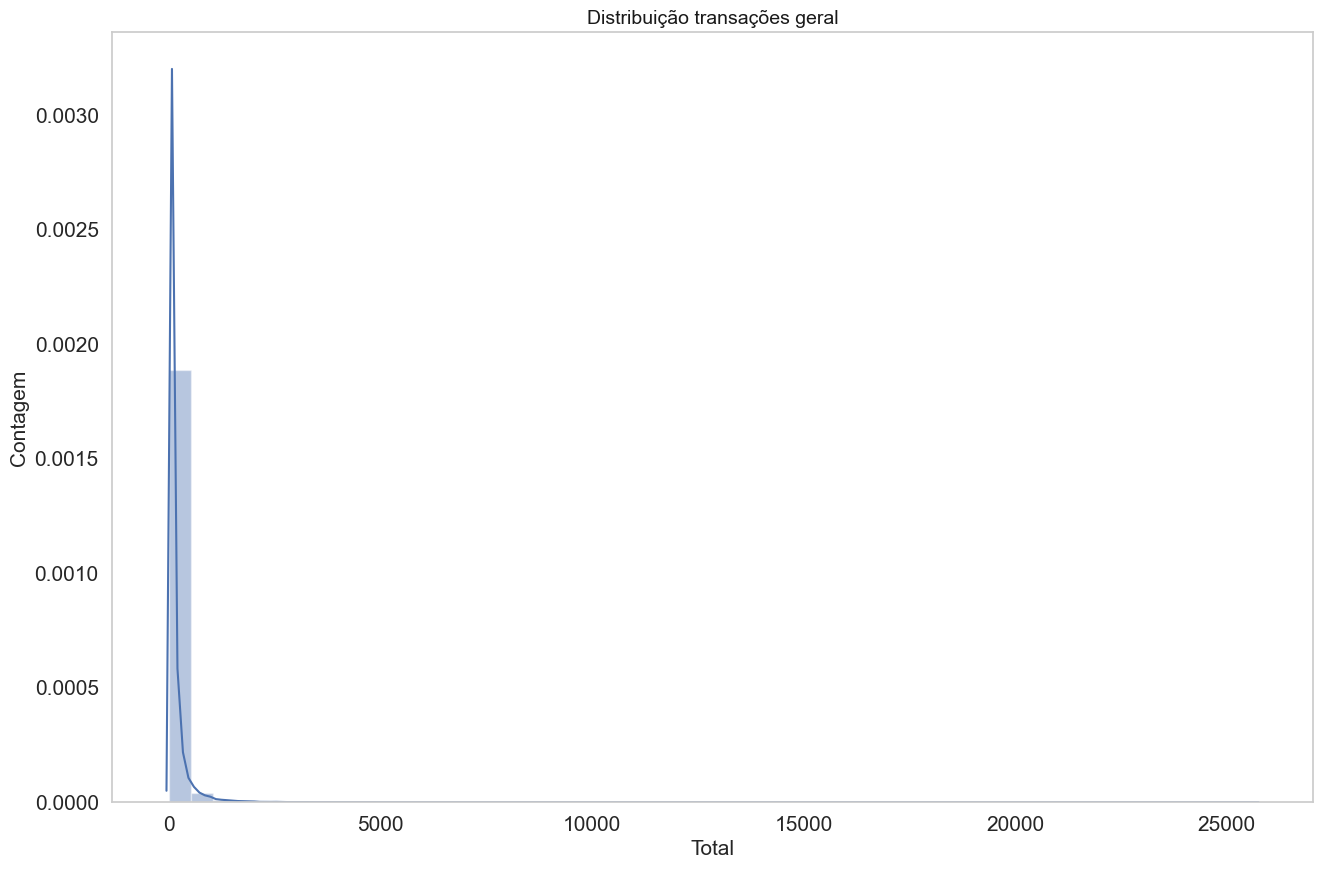

In [12]:
# Grafico transações geral operações cartão credito
plt.figure(figsize=(15.5,10))
sns.distplot(data.Amount)
plt.title("Distribuição transações geral", fontsize=14)
plt.xlabel('Total')
plt.ylabel('Contagem')
plt.grid(False)
plt.show()

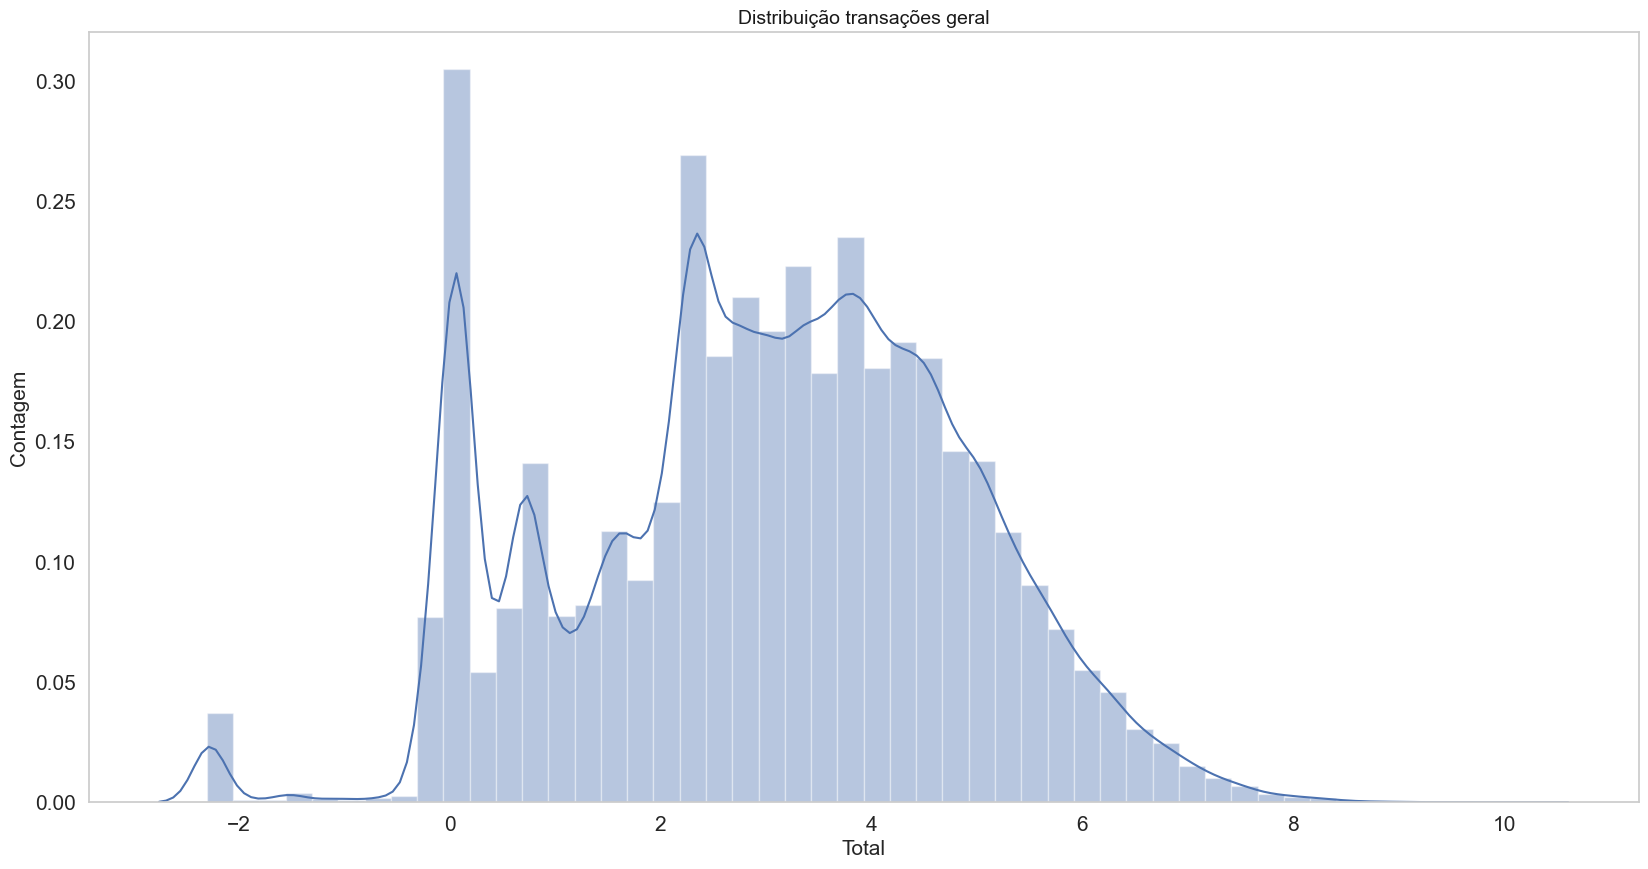

In [13]:
# Gráfico Distribuição transações cartão credito calculo logaritmo
sns.distplot(np.log(data.Amount + 0.1))
plt.title("Distribuição transações geral", fontsize=14)
plt.xlabel('Total')
plt.ylabel('Contagem')
plt.grid(False)
plt.show()

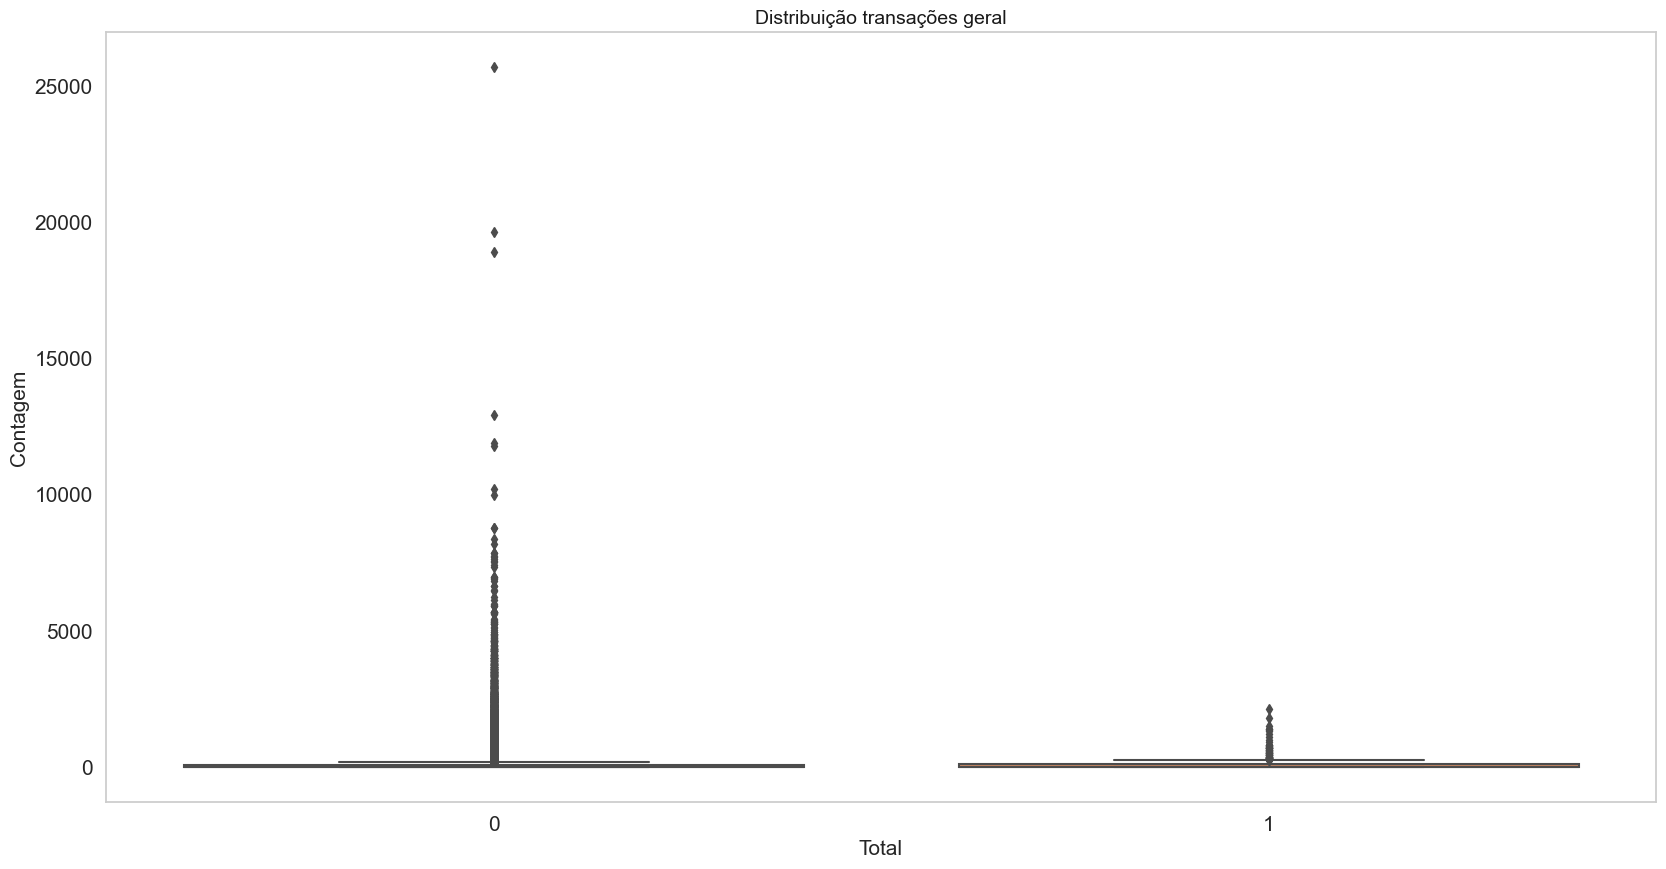

In [14]:
# Grafico de boxplot indentificar outlers
sns.boxplot(x ="Class",y="Amount", data=data)
plt.title("Distribuição transações geral",fontsize=14)
plt.xlabel('Total')
plt.ylabel('Contagem')
plt.grid(False)
plt.show()

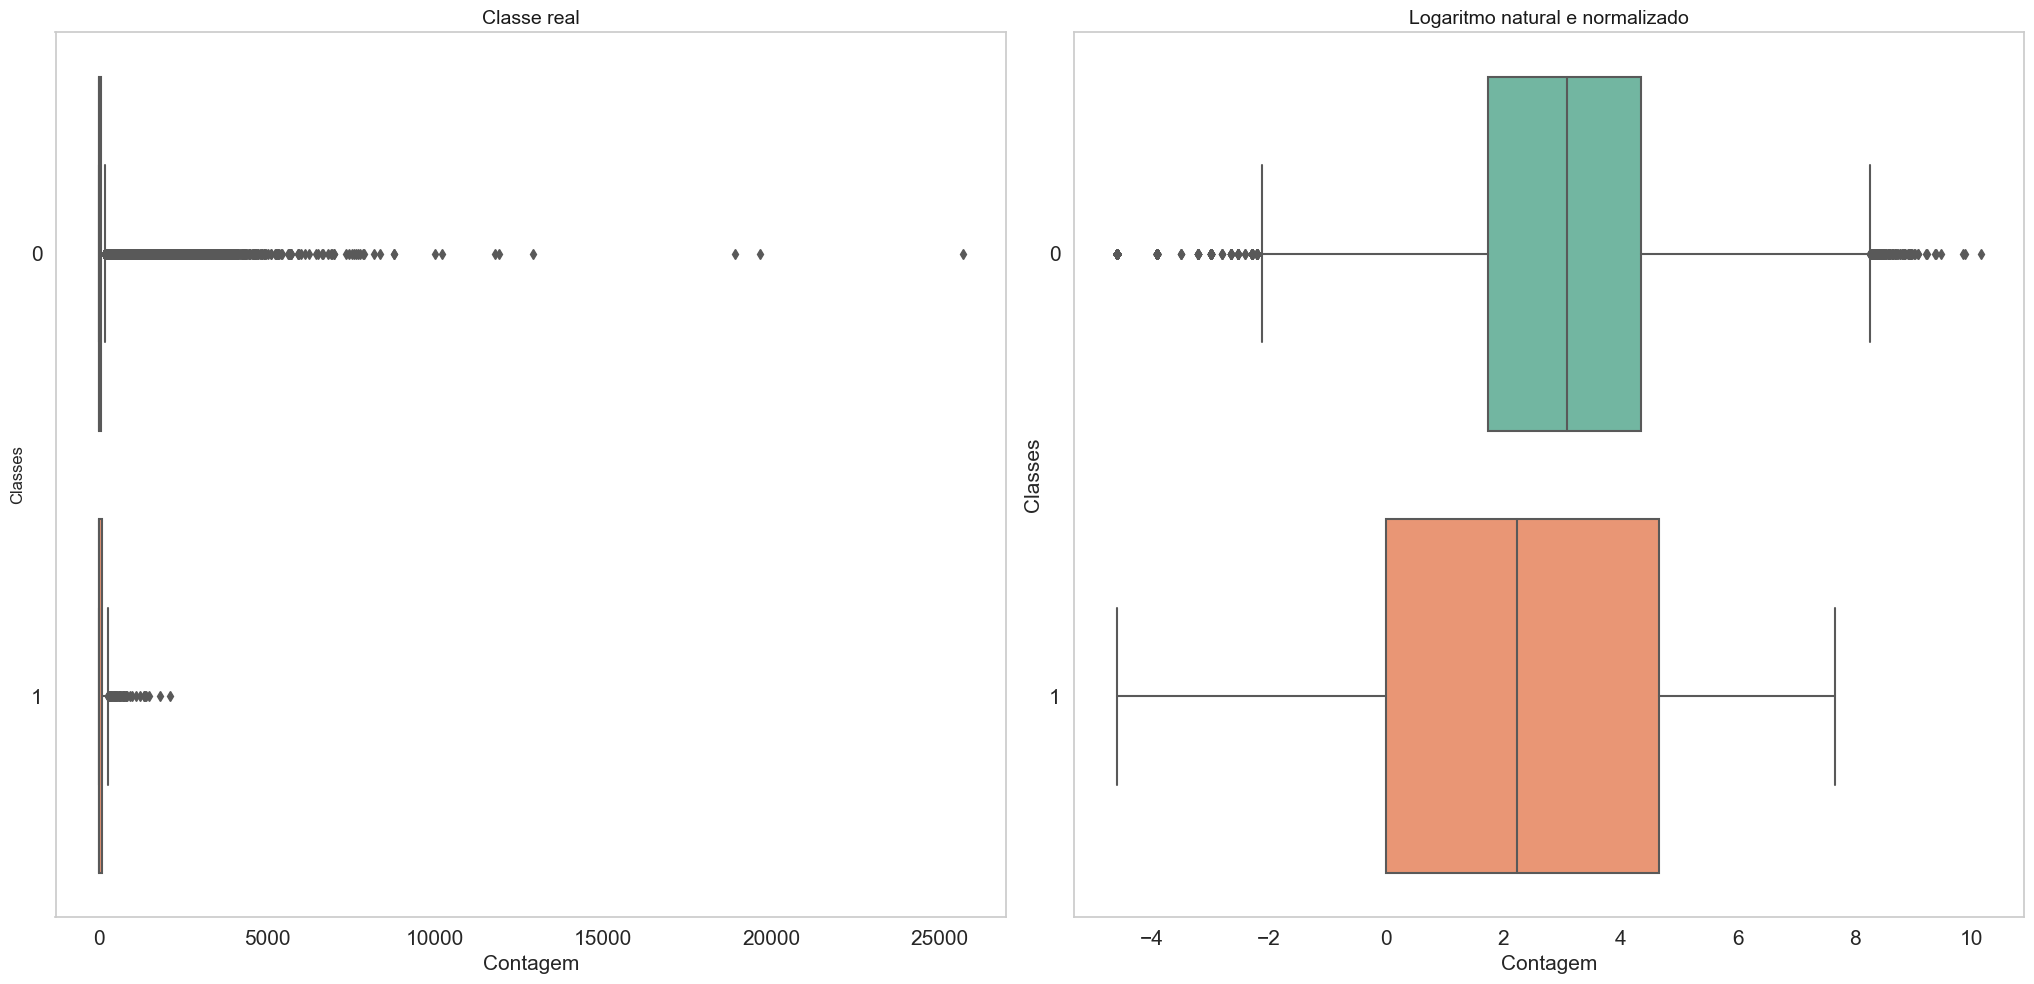

In [15]:
# Grafico com cálcula o logaritmo natural de cada valor presente na coluna Amount.

plt.figure(figsize=(20.5, 10))

plt.subplot(121)
ax = sns.boxplot(y="Class", x="Amount", data=data, orient="h", palette="Set2")
ax.set_title("Classe real", fontsize=14)
ax.set_xlabel("Contagem")
ax.set_ylabel("Classes", fontsize=12)
plt.grid(False)

plt.subplot(122)
ax1 = sns.boxplot(y="Class", x=np.log(data.Amount), data=data, orient="h", palette="Set2")
ax1.set_title("Logaritmo natural e normalizado", fontsize=14)
ax1.set_xlabel("Contagem")
ax1.set_ylabel("Classes")
plt.grid(False)

plt.tight_layout()
plt.show()

Ao examinar a distribuição dos valores e dos horários das transações, pudemos analisar distintamente os padrões entre transações normais e aquelas classificadas como fraudulentas. Essa análise detalhada revela nuances importantes na natureza das transações em ambos os cenários, permitindo uma compreensão mais aprofundada sobre como os valores e os horários variam entre transações legítimas e fraudulentas, fornecendo assim insights cruciais para o processo de detecção de anomalias.

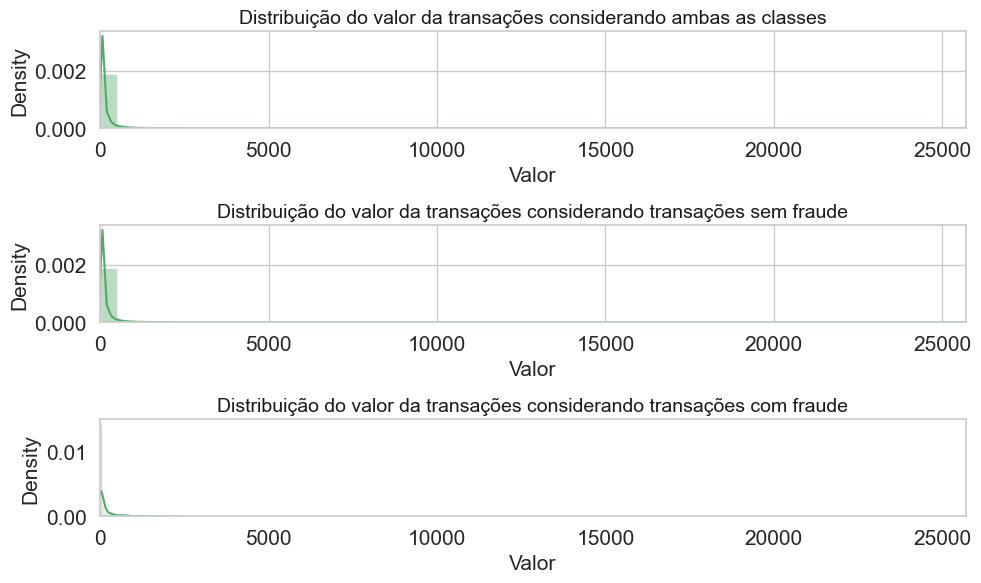

In [16]:
fig, ax = plt.subplots(3, 1, figsize=(10, 6))
sns.distplot(data['Amount'], ax=ax[0], color='g')
ax[0].set_title('Distribuição do valor da transações considerando ambas as classes', fontsize=14)
ax[0].set_xlim([min(data['Amount']), max(data['Amount'])])
ax[0].set_xlabel('Valor')

sns.distplot(data[data['Class']==0]['Amount'], ax=ax[1], color='g')
ax[1].set_title('Distribuição do valor da transações considerando transações sem fraude', fontsize=14)
ax[1].set_xlim([min(data['Amount']), max(data['Amount'])])
ax[1].set_xlabel('Valor')

sns.distplot(data[data['Class']==1]['Amount'], ax=ax[2], color='g')
ax[2].set_title('Distribuição do valor da transações considerando transações com fraude', fontsize=14)
ax[2].set_xlim([min(data['Amount']), max(data['Amount'])])
ax[2].set_xlabel('Valor')
plt.grid(False)

plt.tight_layout()

Durante a análise, notamos que a maioria das transações apresenta valores consideravelmente baixos, enquanto aquelas identificadas como fraudulentas geralmente se concentram em valores inferiores a 4000 unidades monetárias. Esse padrão sugere que a maioria das transações legítimas tende a ser de montantes menores, enquanto as transações fraudulentas mantêm uma tendência de valores mais baixos em relação ao restante do conjunto de dados.

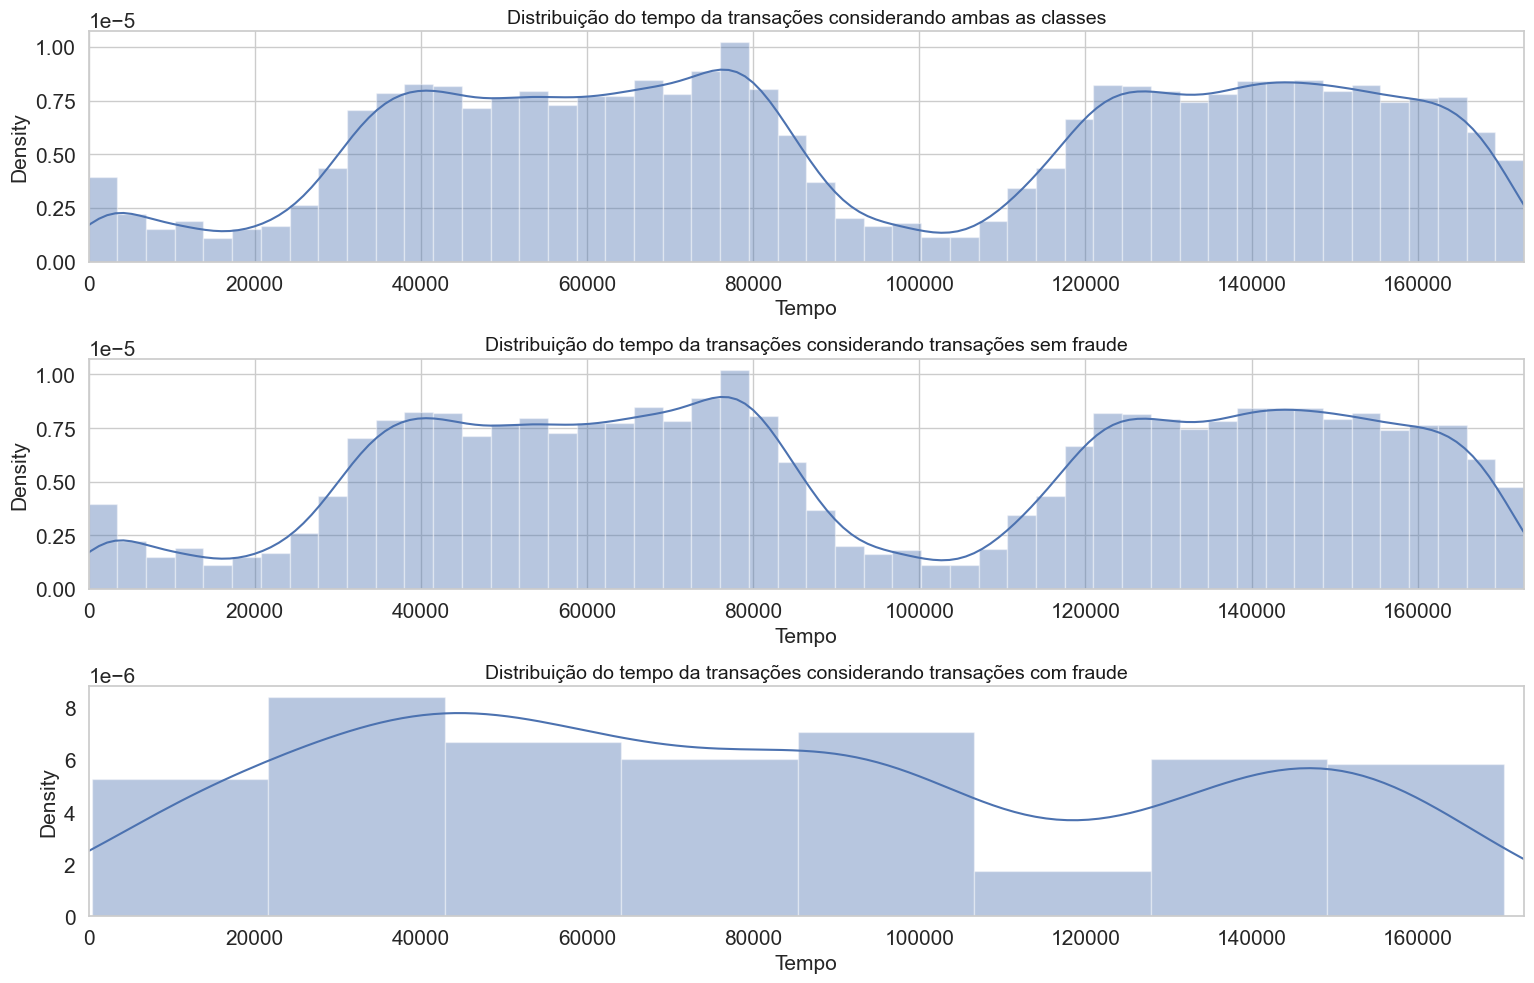

In [17]:
fig, ax = plt.subplots(3, 1, figsize=(15.5, 10))
sns.distplot(data['Time'], ax=ax[0])
plt.grid(False)
ax[0].set_title('Distribuição do tempo da transações considerando ambas as classes', fontsize=14)
ax[0].set_xlim([min(data['Time']), max(data['Time'])])
ax[0].set_xlabel('Tempo')

sns.distplot(data[data['Class']==0]['Time'], ax=ax[1])
ax[1].set_title('Distribuição do tempo da transações considerando transações sem fraude', fontsize=14)
ax[1].set_xlim([min(data['Time']), max(data['Time'])])
ax[1].set_xlabel('Tempo')

sns.distplot(data[data['Class']==1]['Time'], ax=ax[2])
ax[2].set_title('Distribuição do tempo da transações considerando transações com fraude', fontsize=14)
ax[2].set_xlim([min(data['Time']), max(data['Time'])])
ax[2].set_xlabel('Tempo')

plt.tight_layout()

Observamos que as transações regulares exibem uma distribuição assimétrica com dois picos distintos, apresentando médias aproximadas de 5000 e 140000 unidades monetárias. Por outro lado, as transações fraudulentas demonstram uma distribuição mais uniforme em relação ao tempo, destacando-se por essa característica em contraste com o comportamento dos valores das transações não fraudulentas.

## 1.1) Indentificação de outliers

As variáveis Amount e Time exibem uma considerável variabilidade e não estão normalizadas. Diante disso, optamos por aplicar a normalização a ambas as variáveis, utilizando o RobustScaler, uma técnica menos sensível a valores extremos (outliers). Essa abordagem nos permitirá ajustar os dados de forma mais robusta, preservando a distribuição e minimizando o impacto dos valores discrepantes durante o processo de normalização

In [18]:
# Dataset não normalizado
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Feature Engineering
Praticamente todos os algoritmos de Aprendizado de Máquina possuem entradas e saídas. As entradas são formadas por colunas de dados estruturados, onde cada coluna recebe o nome de feature, também conhecido como variáveis independentes ou atributos. Essas features podem ser palavras, pedaços de informação de uma imagem, etc. Os modelos de aprendizado de máquina utilizam esses recursos para classificar as informações. Por exemplo, sedentarismo e fator hereditário são variáveis independentes para quando se quer prever se alguém vai ter câncer ou não

As saídas, por sua vez, são chamadas de variáveis dependentes ou classe, e essa é a variável que estamos tentando prever. O nosso resultado pode ser 0 e 1 correspondendo a 'Não' e 'Sim' respectivamente, que responde a uma pergunta como: "Fulano é bom pagador?" ou a probabilidade de alguém comprar um produto ou não.

In [19]:
# Importando biblioteca
from sklearn.preprocessing import StandardScaler, RobustScaler

# Criando um objeto
pre_scaler = RobustScaler()

# Treinamento
data['Amount'] = pre_scaler.fit_transform(data['Amount'].values.reshape(-1,1))
data['Time'] = pre_scaler.fit_transform(data['Time'].values.reshape(-1,1))

# Visualizando
pre_scaler

RobustScaler()

In [20]:
# Visualizando dataset novo normalizado
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.783274,0
1,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.269825,0
2,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.983721,0
3,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.418291,0
4,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.670579,0


In [21]:
# Salvando dataset normalizado
data.to_csv("dataset_normalizado.csv")
base = pd.read_csv("dataset_normalizado.csv")

Para prosseguir com o processo, iremos dividir a amostra em conjuntos distintos de variáveis de treino e teste. Nesta etapa inicial, utilizaremos a amostra completa para testar o modelo, porém, ao implementar o modelo final, optaremos por utilizar apenas uma parte balanceada da amostra para garantir uma abordagem mais equilibrada na avaliação do desempenho do modelo.

In [22]:
# Divisão treino teste
x = data.drop(['Class'],axis=1)
y = data['Class']

In [23]:
# Visualizando dados x
x.shape

(284807, 30)

## 1.2) Validação cruzada 


**KFold:** É um método de validação cruzada que divide o conjunto de dados em k subconjuntos (também conhecidos como "folds") de tamanhos iguais. O algoritmo é treinado k vezes, usando um dos subconjuntos como conjunto de teste em cada iteração e os restantes como conjunto de treinamento. Em resumo, o conjunto de dados é dividido em k partes e o modelo é treinado k vezes, cada vez utilizando uma parte diferente como conjunto de teste e as outras partes como conjunto de treinamento.



**StratifiedKFold:** É uma variação do KFold que leva em consideração a distribuição das classes nos dados. Em conjuntos de dados desbalanceados, ou seja, quando há um número significativamente diferente de exemplos para cada classe, o StratifiedKFold garante que a proporção entre as classes seja mantida em cada dobra. Isso é importante para garantir que cada dobra seja representativa da distribuição global das classes, reduzindo o viés na validação cruzada.


Em resumo, o KFold é uma técnica de validação cruzada padrão que divide os dados em subconjuntos de tamanho igual, enquanto o StratifiedKFold é uma versão do KFold que mantém a proporção entre as classes em cada dobra, sendo especialmente útil em conjuntos de dados desbalanceados.

In [24]:
## Dados com balanceada da amostra

# Importando biblioteca
from sklearn.model_selection import KFold, StratifiedKFold

# Criando um objeto
stratified_k_fold = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

# Percorrendo dados
for x_train, y_test in stratified_k_fold.split(x, y):
    print('Treinamento: \n')
    print('-' * 100)
    print("Treinamento dados:", x_train, "Treinamento teste", y_test)
    x_treino, x_teste = x.iloc[x_train], x.iloc[y_test]
    y_treino, y_teste = y.iloc[x_train], y.iloc[y_test]
    
# Visualizando dados treino teste

x_treino = x_treino.values
x_teste = x_teste.values
y_treino = y_treino.values
y_teste = y_teste.values

label_treino, label_contagem_y_treino = np.unique(y_treino, return_counts=True)
label_teste, label_contagem_x_teste = np.unique(y_teste, return_counts=True)
print('-' * 100)

print('Distruição das classes: \n')
print(label_contagem_y_treino/ len(y_treino))
print(label_contagem_x_teste/ len(y_teste))

Treinamento: 

----------------------------------------------------------------------------------------------------
Treinamento dados: [ 30473  30496  31002 ... 284804 284805 284806] Treinamento teste [    0     1     2 ... 57017 57018 57019]
Treinamento: 

----------------------------------------------------------------------------------------------------
Treinamento dados: [     0      1      2 ... 284804 284805 284806] Treinamento teste [ 30473  30496  31002 ... 113964 113965 113966]
Treinamento: 

----------------------------------------------------------------------------------------------------
Treinamento dados: [     0      1      2 ... 284804 284805 284806] Treinamento teste [ 81609  82400  83053 ... 170946 170947 170948]
Treinamento: 

----------------------------------------------------------------------------------------------------
Treinamento dados: [     0      1      2 ... 284804 284805 284806] Treinamento teste [150654 150660 150661 ... 227866 227867 227868]
Treinament

Nesta etapa, adotaremos o método de subamostragem aleatória para alcançar um equilíbrio nos dados, evitando o fenômeno conhecido como overfitting, que pode ser desencadeado por conjuntos de dados desbalanceados.

Ao identificarmos 492 transações classificadas como fraudulentas, procederemos selecionando aleatoriamente a mesma quantidade de transações não fraudulentas para assegurar um balanceamento na amostra. Posteriormente, efetuaremos a mistura dos dados, a fim de permitir que os modelos possam capturar os diferentes padrões existentes em ambos os tipos de transações. Essa abordagem visa garantir que o modelo seja treinado de maneira mais equilibrada, considerando tanto as transações comuns quanto as fraudulenta, o que pode resultar em uma melhor capacidade de generalização durante o processo de aprendizado

## 1.3) Análisando fraudes

In [25]:
# Amostra dados
data = data.sample(frac=1)
data_tamanho_fraude = len(data[data['Class']==1])

In [26]:
# Amostra de fraude
data_fraude = data.loc[data['Class'] == 1]
data_sem_fraude = data.loc[data['Class'] == 0][:data_tamanho_fraude]

# Concat novos dados
data_novos = pd.concat([data_fraude, data_sem_fraude])
data_novos = data_novos.sample(frac=1, random_state=42)

In [27]:
# Visualizando
data_novos

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
216752,0.657010,-1.063850,-0.051868,-1.919518,-1.388910,3.787603,3.005170,0.257869,-0.295594,0.183068,-0.608831,0.350927,-0.349206,-0.336523,-1.038393,1.001495,0.155104,0.185223,0.548299,-0.679417,-0.533585,0.875285,0.585185,0.515692,0.600866,0.200274,-0.167745,-0.230944,-0.048448,-0.198002,0
15451,-0.679742,-20.532751,12.373989,-23.009003,6.144821,-15.587296,-4.384491,-15.939003,13.696416,-3.948455,-8.789723,5.612347,-7.914422,0.307820,-8.328601,-0.006979,-6.824524,-13.316079,-4.921612,1.188204,1.592754,1.754608,-1.466115,-0.856779,0.125777,1.402587,-0.223755,1.574249,0.469201,1.089779,1
162212,0.355291,-0.787216,0.281731,1.849518,-2.669917,0.254693,0.085318,0.533509,-0.223949,-0.813033,0.647902,1.060586,-0.135606,0.375324,-0.975829,-1.100270,1.165685,-0.481686,-0.957308,0.162533,0.502328,0.086138,0.668519,-0.513103,0.732363,0.751228,-0.224408,0.032150,-0.278453,-0.224970,0
181966,0.475898,-0.769172,1.342212,-2.171454,-0.151513,-0.648374,-0.973504,-1.706658,0.313745,-1.982302,-3.158127,1.341572,-3.299472,1.247647,-6.393373,-0.053205,-3.258046,-3.348896,0.217331,-0.917408,-0.102294,-0.036122,-0.753591,-0.047113,0.358493,-0.287407,0.476506,0.250531,0.250987,0.251520,1
44001,-0.504576,-2.144411,1.073499,-2.773663,1.384394,-4.015477,0.747235,1.525638,0.192988,-2.431862,-4.155838,4.354775,-2.872400,0.468875,-4.555667,0.699671,-2.901141,-4.674667,-2.213623,1.296165,0.668124,0.144653,-0.885682,0.625099,0.096527,-0.189455,0.532908,0.423045,-0.210266,10.906449,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76555,-0.329750,-7.901421,2.720472,-7.885936,6.348334,-5.480119,-0.333059,-8.682376,1.164431,-4.542447,-7.748480,5.266586,-8.679679,-1.166366,-8.107975,0.701365,-6.288306,-13.753131,-4.329239,1.504250,-0.614719,0.077739,1.092437,0.320133,-0.434643,-0.380687,0.213630,0.423620,-0.105169,1.836931,1
191267,0.522727,0.290155,0.049243,-0.740524,2.865463,1.395294,-0.535163,0.142543,-0.222770,-1.463691,1.713538,-1.127573,-0.708657,0.272186,0.274710,0.235192,-0.463553,0.472995,-0.447899,1.790924,0.247580,0.337349,1.018191,0.303550,0.833886,-1.222306,2.745261,-0.220402,0.168233,-0.207084,1
159255,0.325309,2.032175,-0.256204,-1.454236,0.107183,0.003159,-0.694245,-0.104998,-0.010291,0.864392,0.142676,0.588235,-0.320586,-2.525156,1.170049,0.468120,0.029727,-0.636223,0.892263,0.098815,-0.376981,0.291689,0.830521,0.038771,0.719907,0.229786,-0.467220,-0.016387,-0.061779,-0.293440,0
215132,0.649197,-2.921944,-0.228062,-5.877289,2.201884,-1.935440,0.631141,-1.245106,1.511348,-1.899987,-6.428231,4.229154,-5.292314,-0.888087,-7.672250,0.547571,-4.307060,-5.701174,-1.772803,-0.193132,2.230735,1.441622,0.895528,1.385511,-2.028024,0.509131,0.172643,0.726781,0.234514,9.798225,1


In [28]:
# Salvando dataset
data_novos.to_csv("dataset_limpo_2.csv")

Para aprofundar nossa análise sobre o balanceamento após a subamostragem, estamos gerando um novo gráfico de contagem. Esta visualização nos permitirá verificar visualmente como a seleção aleatória e equilibrada das transações fraudulentas e não fraudulentas influenciou a distribuição dos dados. Com esse gráfico atualizado, teremos uma representação visual clara e concisa do nível de balanceamento alcançado após o processo de ajuste da amostra

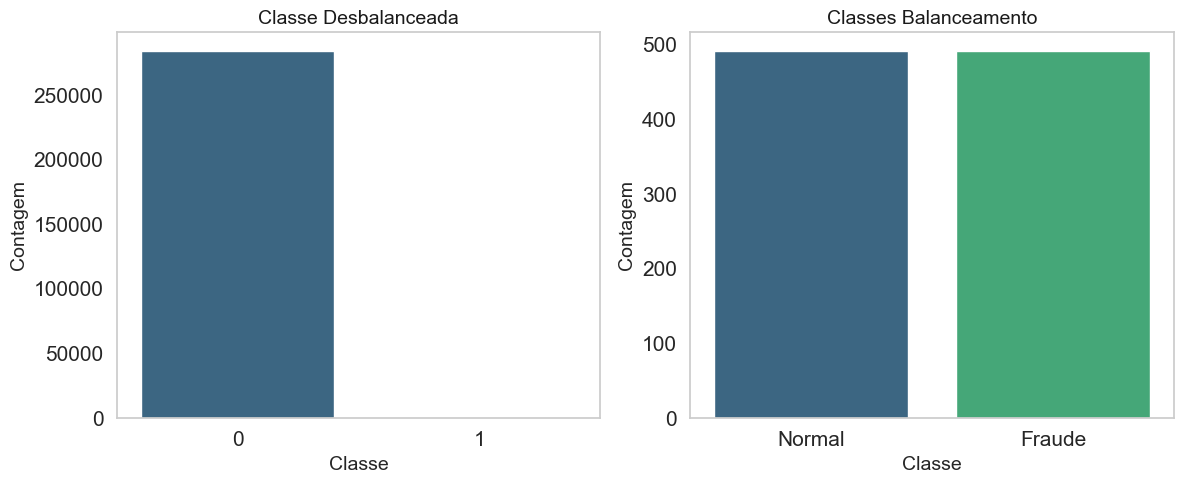

In [29]:
# Criando uma figura para os subplots
plt.figure(figsize=(12, 5))

# Subplot 1 - Gráfico de contagem de barras para a classe desbalanceada
plt.subplot(1, 2, 1)  # 1 linha, 2 colunas, subplot 1
sns.countplot(data=data, x="Class", palette='viridis')
plt.xlabel('Classe', fontsize=14)
plt.ylabel('Contagem', fontsize=14)
plt.title("Classe Desbalanceada", fontsize=14)
plt.grid(False)

# Subplot 2 - Gráfico de contagem de barras para a classe com balanceamento
plt.subplot(1, 2, 2)  # 1 linha, 2 colunas, subplot 2
data_2_tmp = data_novos.copy()
data_2_tmp['Class'] = data_2_tmp['Class'].apply(ana_fraud)
sns.countplot(data=data_2_tmp, x='Class', palette='viridis')
plt.xlabel('Classe', fontsize=14)
plt.ylabel('Contagem', fontsize=14)
plt.title("Classes Balanceamento", fontsize=14)
plt.grid(False)

# Ajuste de layout e exibição dos subplots
plt.tight_layout()
plt.show()

Estamos prestes a calcular a matriz de correlação, um passo crucial para identificar as variáveis que possam ter maior sensibilidade em relação às transações fraudulentas. Para garantir uma identificação mais precisa, realizaremos esse cálculo utilizando a amostra balanceada gerada. Adicionalmente, apresentaremos a matriz de correlação antes do balanceamento, evidenciando como a falta de equilíbrio nos dados tornaria extremamente desafiador identificar as variáveis mais relevantes em relação às transações fraudulentas. Essa comparação nos permitirá visualizar claramente como o processo de balanceamento influencia a identificação das principais variáveis envolvidas nas transações fraudulentas.

## 1.5) Correlação dados

In [30]:
# Visualizando correlação
desbalanceada_correlacao = data.corr()
balanceada_correlacao = data_novos.corr()

Text(0.5, 1.0, 'Matriz de correlação dados balanceados')

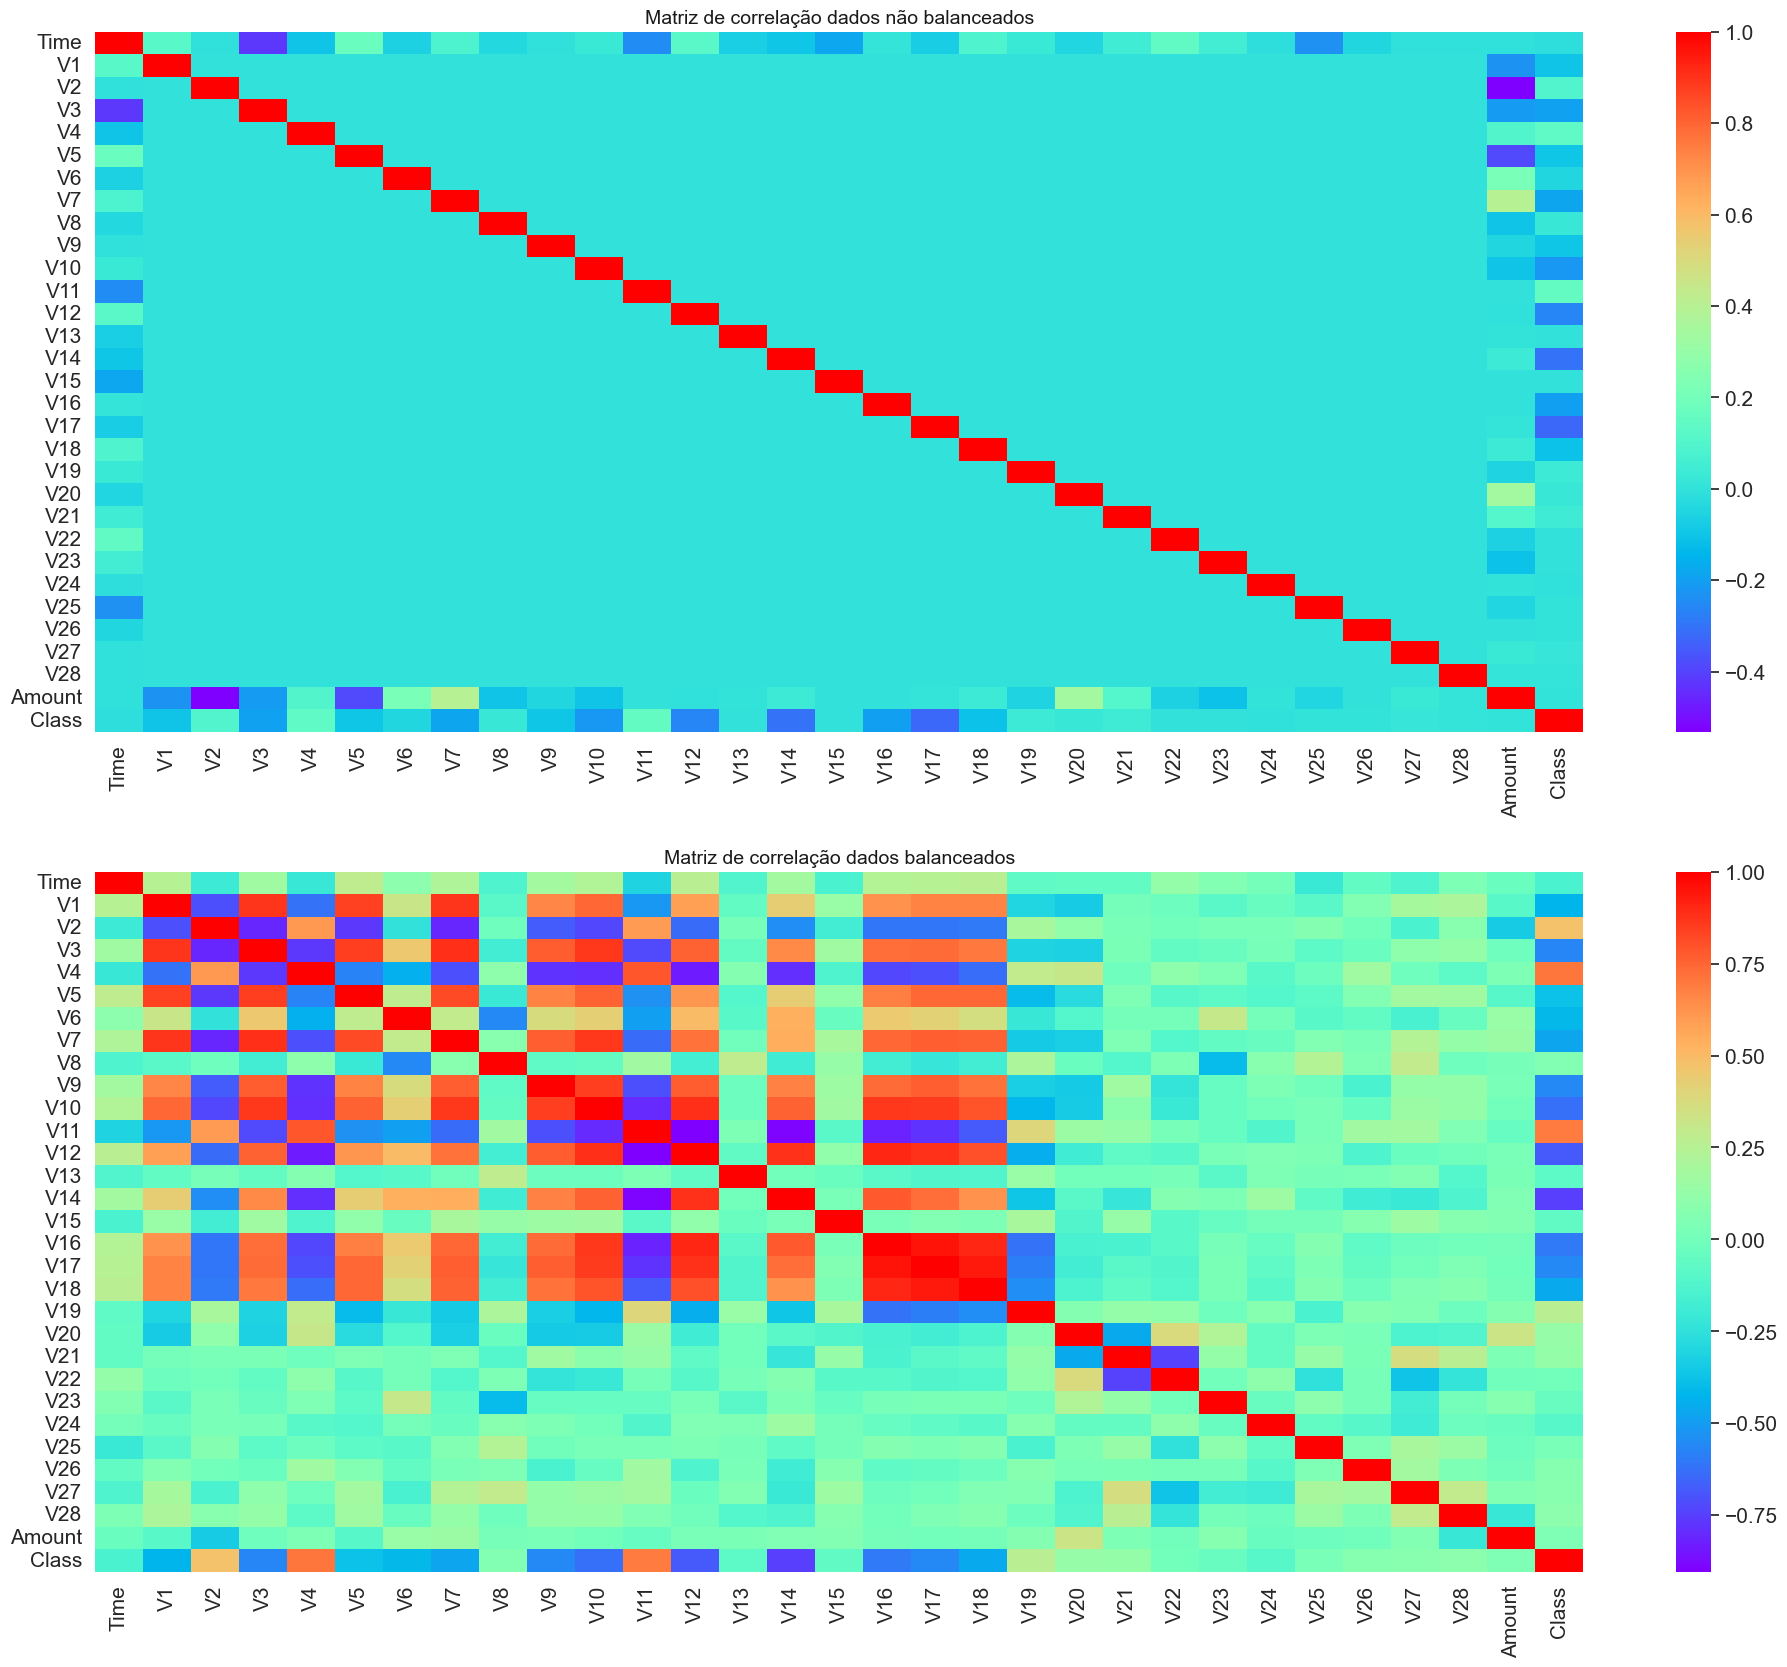

In [31]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))

sns.heatmap(desbalanceada_correlacao, cmap='rainbow', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Matriz de correlação dados não balanceados", fontsize=14)

sns.heatmap(balanceada_correlacao, cmap='rainbow', annot_kws={'size':20}, ax=ax2)
ax2.set_title('Matriz de correlação dados balanceados', fontsize=14)

Podemos notar que, no caso da amostra não balanceada, parece não haver correlação visível entre as variáveis. No entanto, após a aplicação da amostra balanceada, torna-se evidente a presença de correlação entre elas.

Observamos que as variáveis V3, V10, V12 e V14 exibem uma correlação negativa, onde valores mais negativos indicam uma maior probabilidade de a transação ser classificada como fraude.

Por outro lado, as variáveis V2, V4 e V11 apresentam uma correlação positiva, indicando que valores mais altos nessas variáveis sugerem uma maior probabilidade de fraude estar presente nas transações. Essas relações são cruciais para identificar padrões nos dados e podem ser usadas como indicadores significativos na detecção de fraudes.

<AxesSubplot: xlabel='Class', ylabel='V11'>

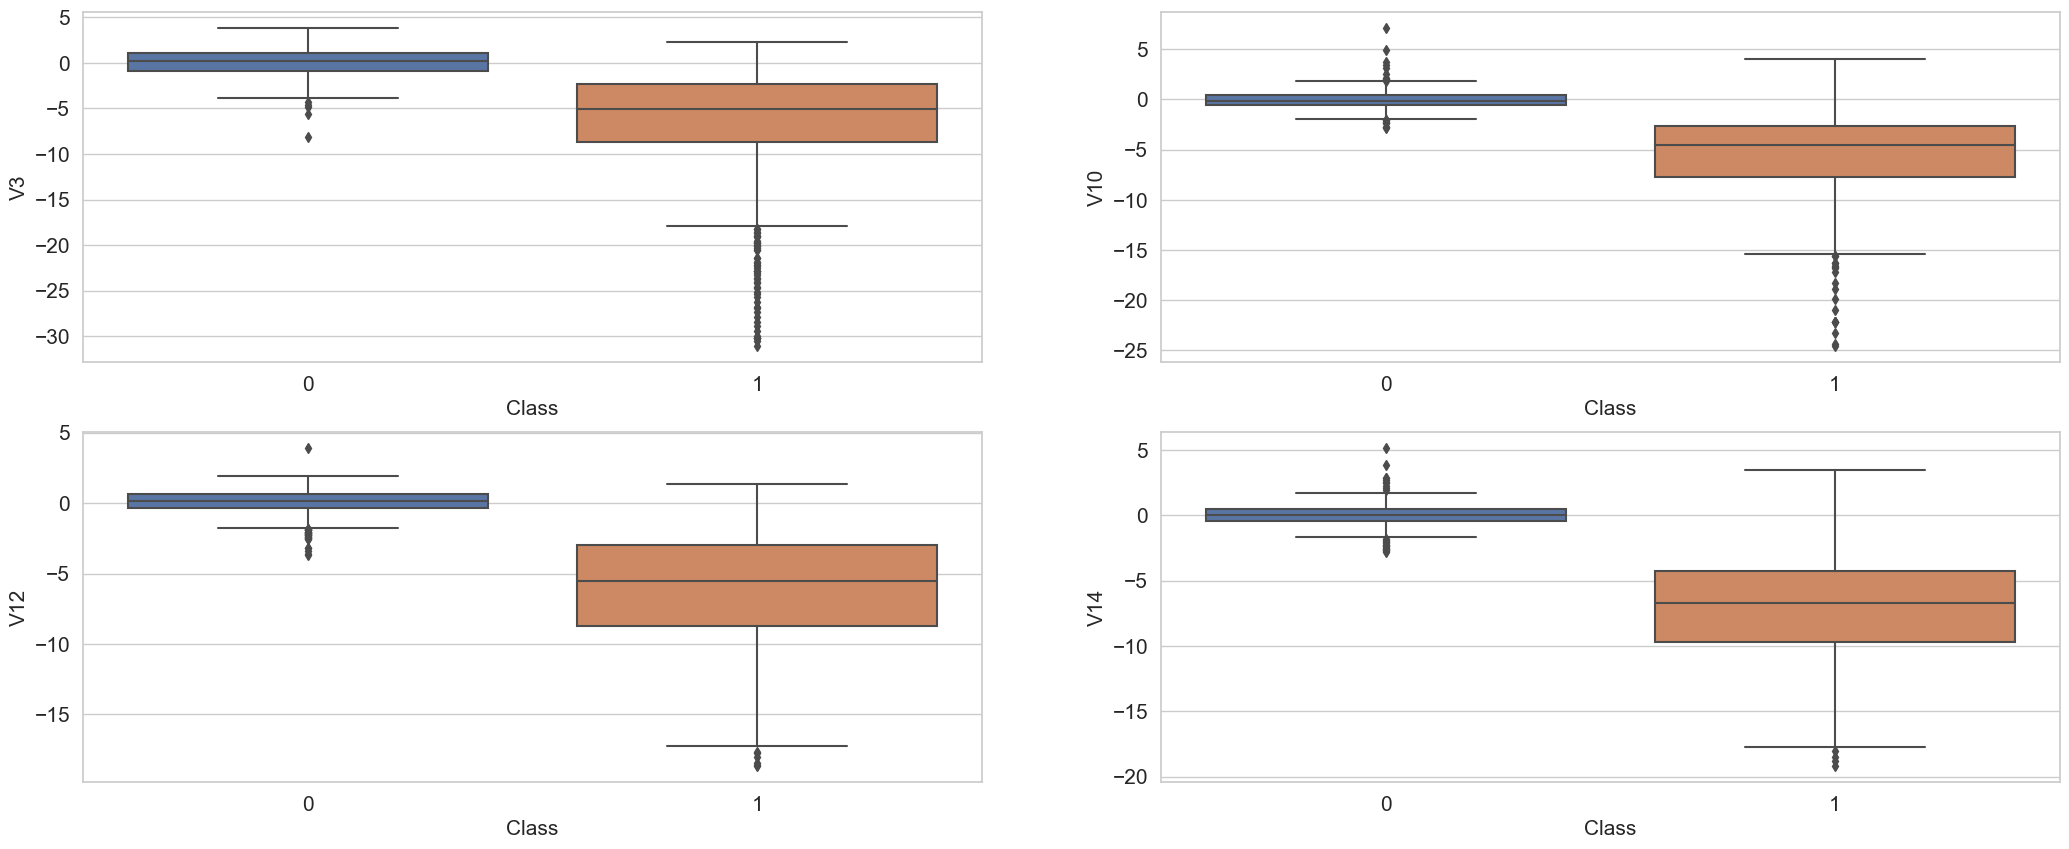

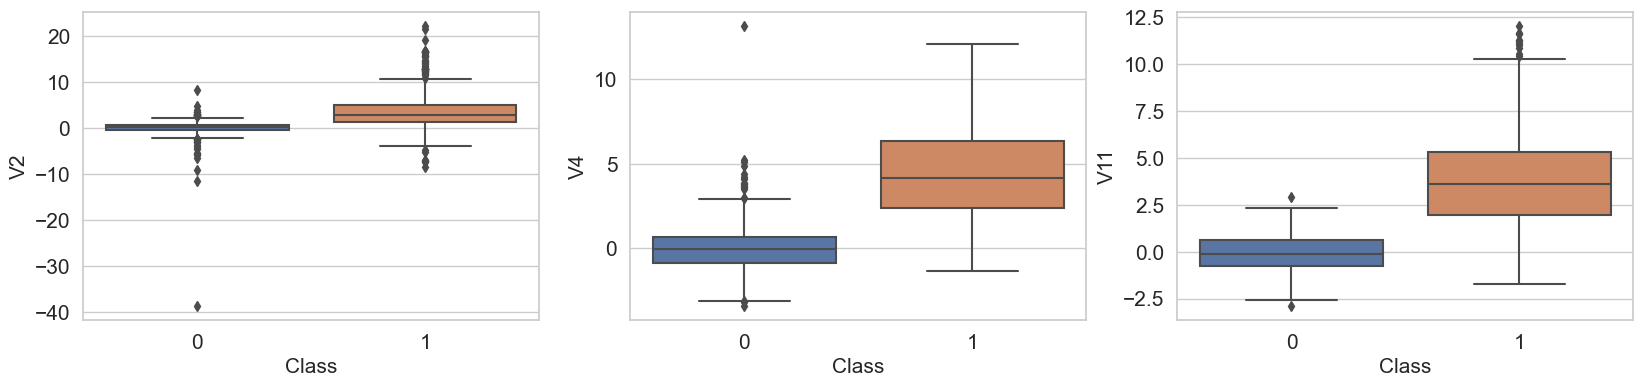

In [32]:
# boxplot irão nos ajudara
f, ax = plt.subplots(2,2, figsize=(25.5, 10))

sns.boxplot(x="Class", y="V3", data=data_novos,ax=ax[0][0])
sns.boxplot(x="Class", y="V10", data=data_novos,ax=ax[0][1])
sns.boxplot(x="Class", y="V12", data=data_novos,ax=ax[1][0])
sns.boxplot(x="Class", y="V14", data=data_novos,ax=ax[1][1])

f, ax = plt.subplots(1,3, figsize=(20,4))

sns.boxplot(x="Class", y="V2", data=data_novos,ax=ax[0])
sns.boxplot(x="Class", y="V4", data=data_novos,ax=ax[1])
sns.boxplot(x="Class", y="V11", data=data_novos,ax=ax[2])

Durante a análise dos boxplots de todas as variáveis, identificamos a presença significativa de muitos outliers, o que pode ter um impacto prejudicial no desempenho dos modelos de classificação. Para lidar com esse cenário, realizaremos uma análise detalhada de cada boxplot, dedicando atenção especial à identificação e remoção desses outliers.

O processo de remoção dos outliers é crucial para garantir a robustez e a precisão dos modelos de classificação. Ao investigar minuciosamente cada variável e proceder com a remoção cuidadosa dos outliers identificados, buscaremos aprimorar a qualidade dos dados, preparando um conjunto mais confiável para a construção dos modelos de machine learning.

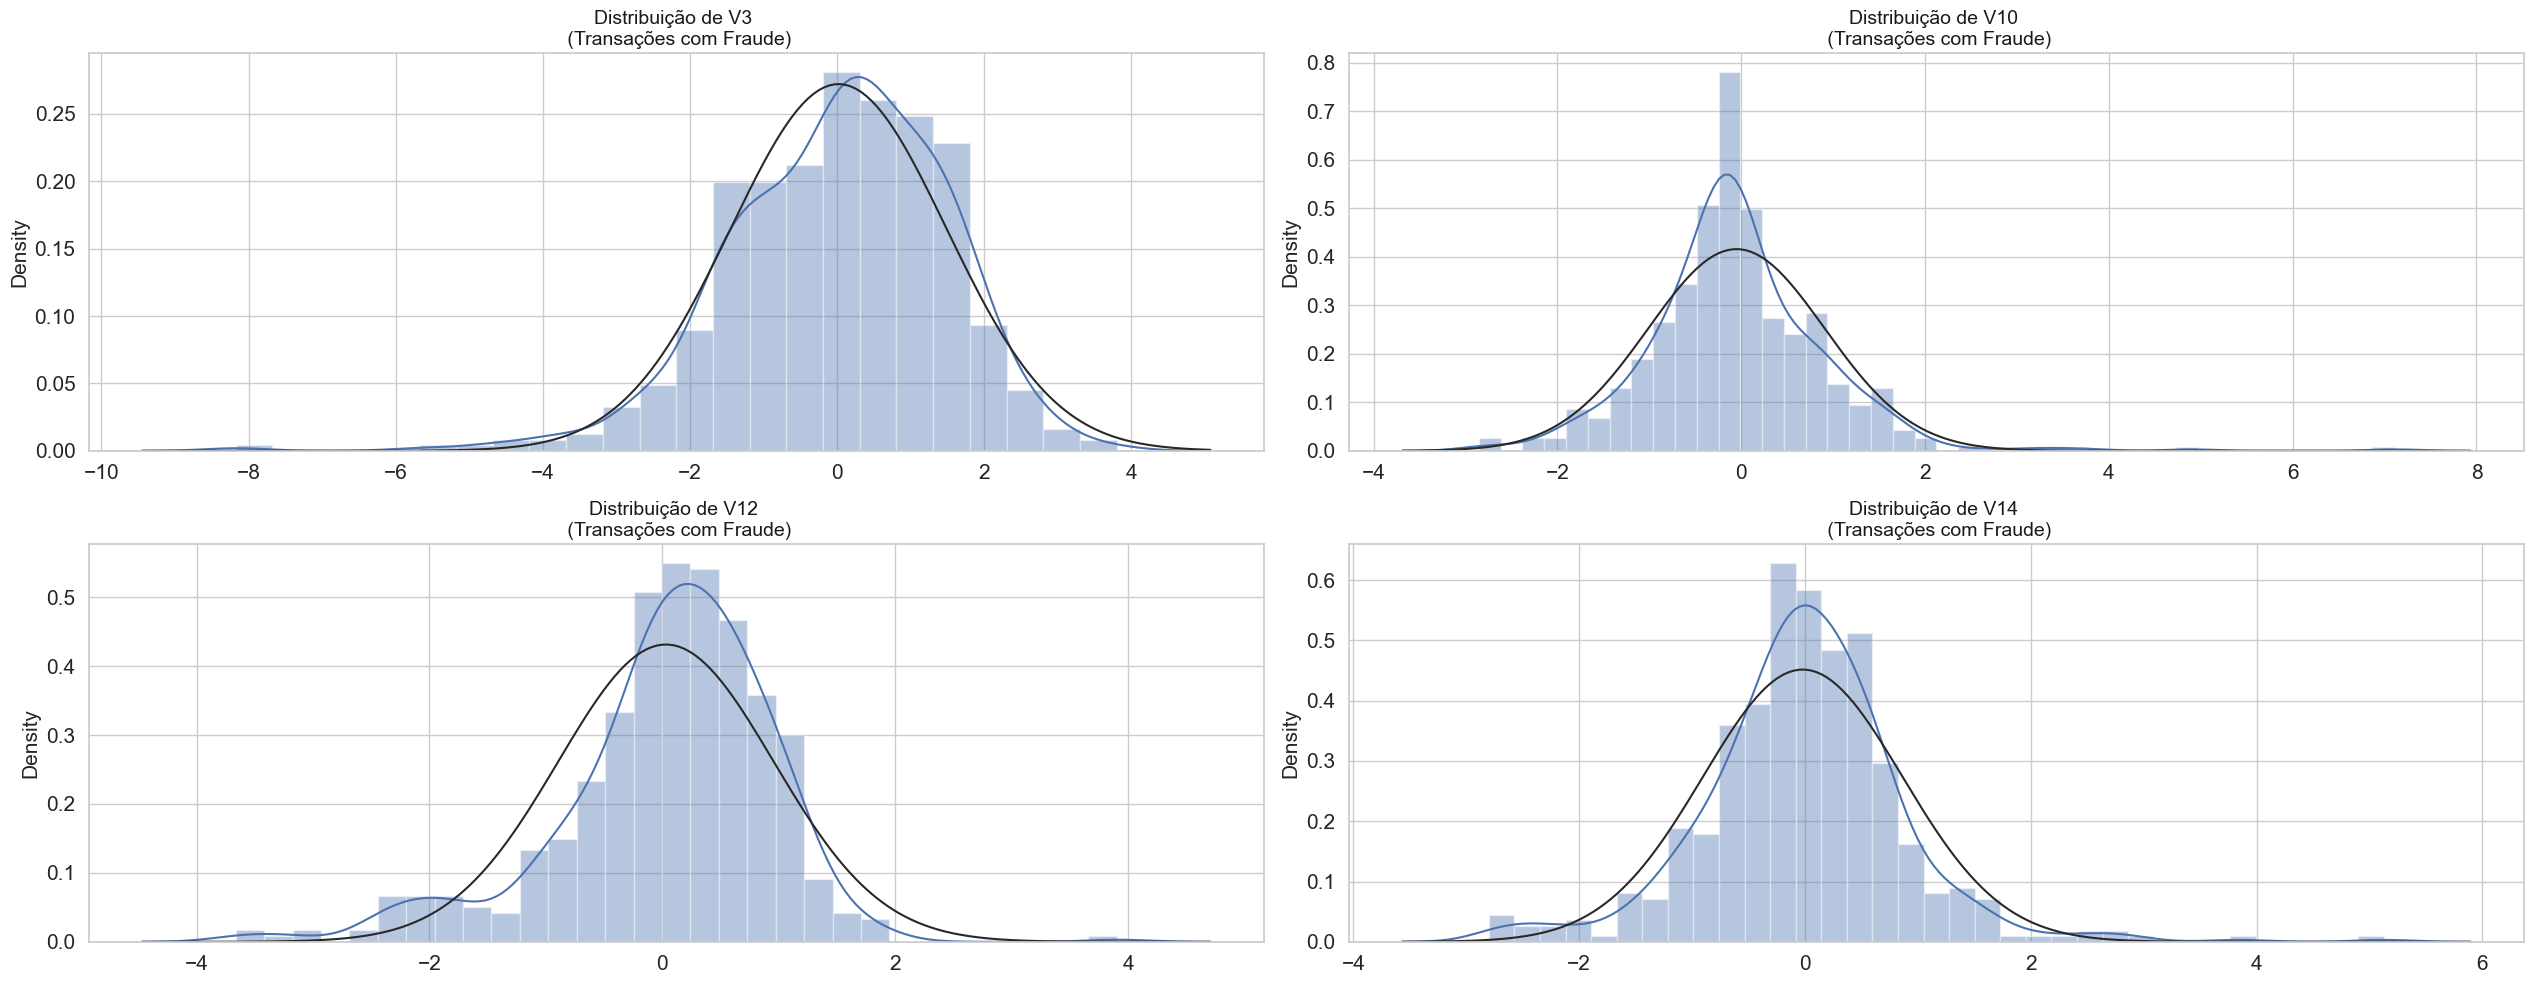

In [33]:
# Importando biblioteca
from scipy.stats import norm

f, ax = plt.subplots(2,2, figsize=(25.5, 10))

distribuicao_v3 = data_novos['V3'].loc[data_novos['Class'] == 0].values
sns.distplot(distribuicao_v3,ax=ax[0][0], fit=norm)
ax[0][0].set_title('Distribuição de V3 \n (Transações com Fraude)', fontsize=14)

distribuicao_v10 = data_novos['V10'].loc[data_novos['Class'] == 0].values
sns.distplot(distribuicao_v10,ax=ax[0][1], fit=norm)
ax[0][1].set_title('Distribuição de V10 \n (Transações com Fraude)', fontsize=14)

distribuicao_v12 = data_novos['V12'].loc[data_novos['Class'] == 0].values
sns.distplot(distribuicao_v12,ax=ax[1][0], fit=norm)
ax[1][0].set_title('Distribuição de V12 \n (Transações com Fraude)', fontsize=14)

distribuicao_v14 = data_novos['V14'].loc[data_novos['Class'] == 0].values
sns.distplot(distribuicao_v14,ax=ax[1][1], fit=norm)
ax[1][1].set_title('Distribuição de V14 \n (Transações com Fraude)', fontsize=14)

plt.tight_layout()

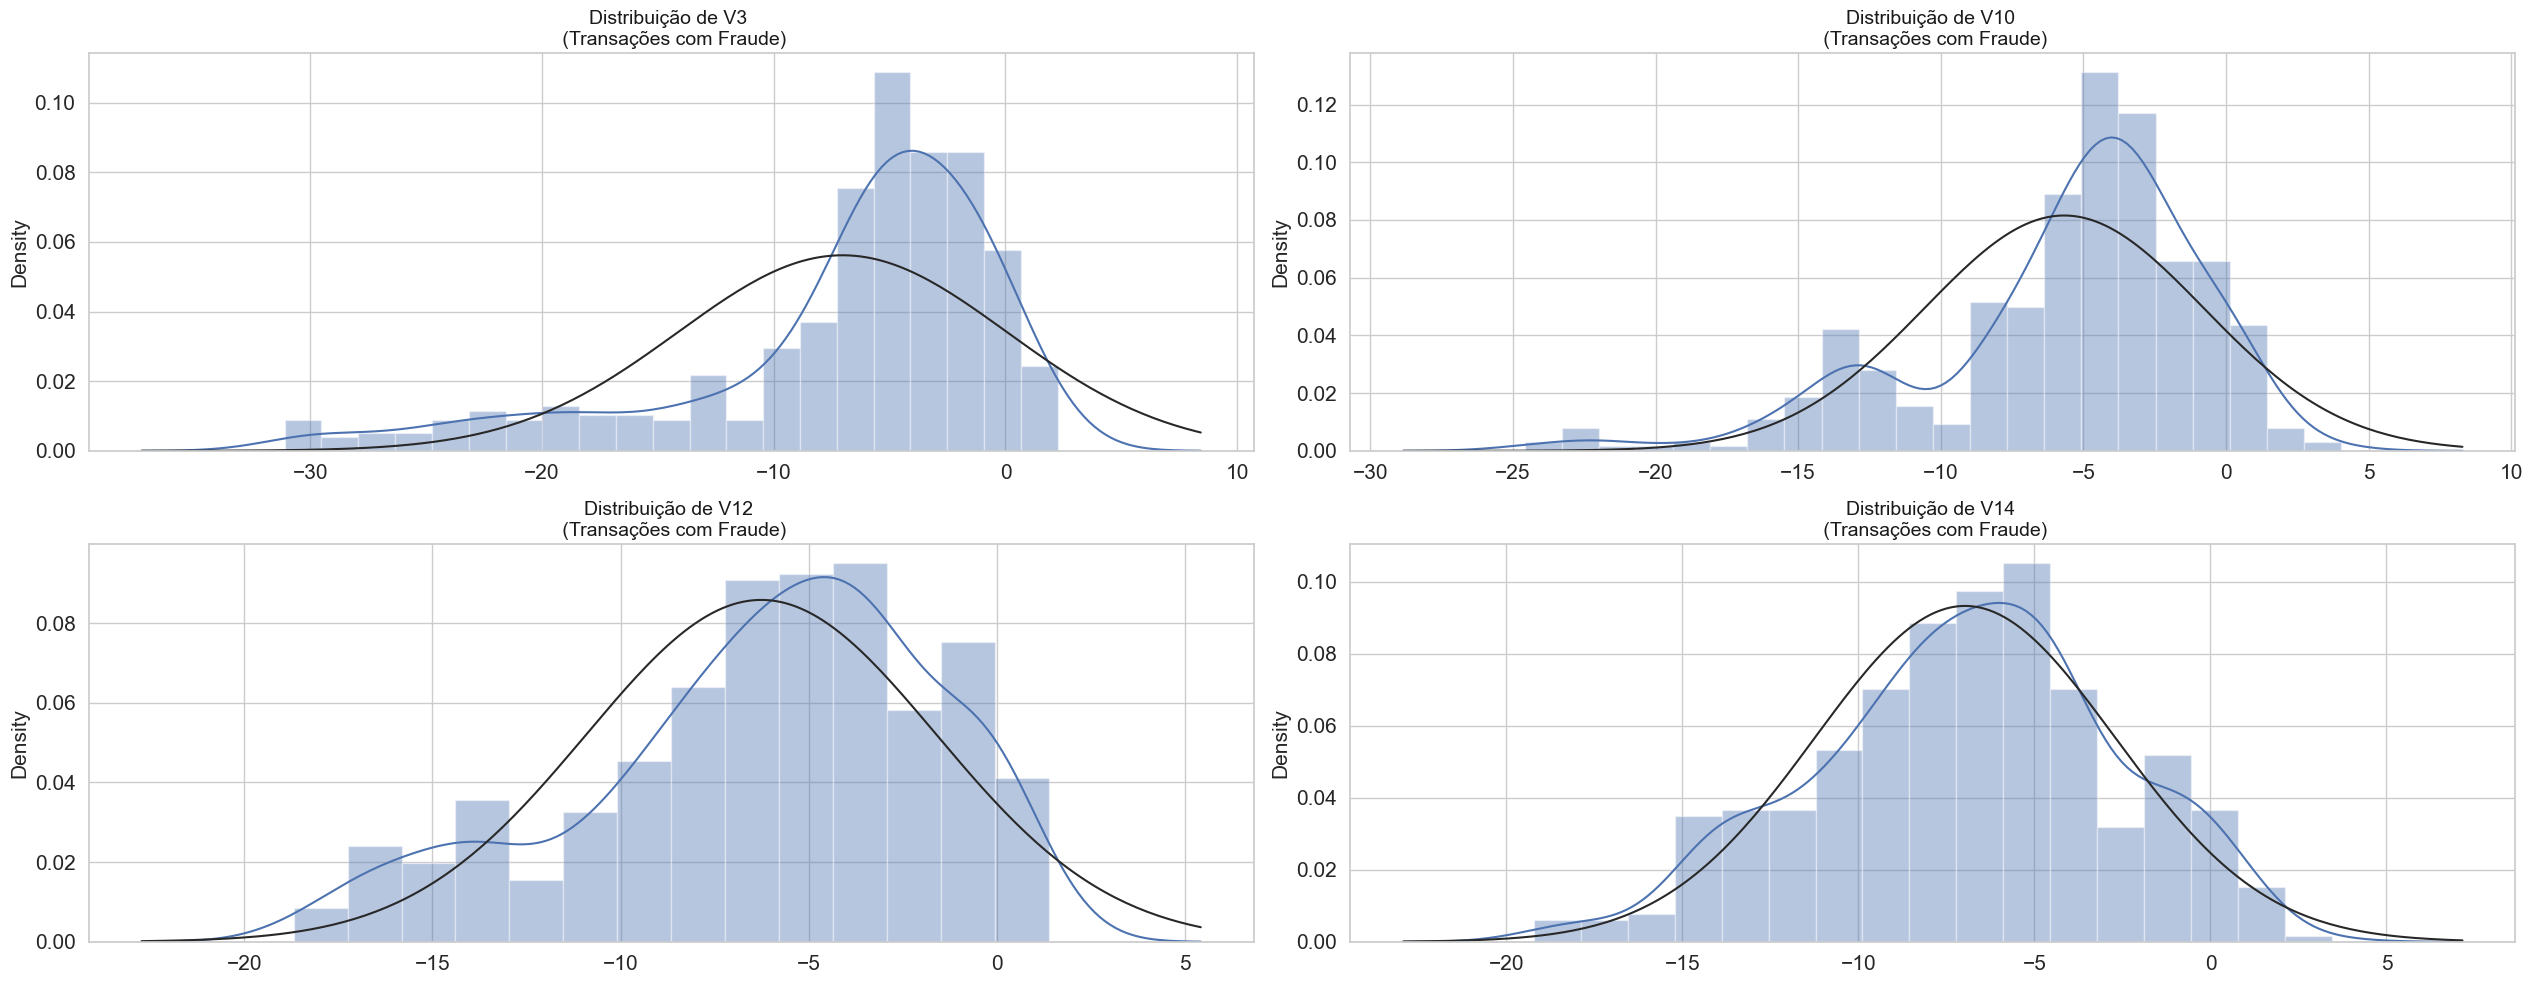

In [34]:
f, ax = plt.subplots(2,2, figsize=(25.5, 10))

v3_distribuicao = data_novos['V3'].loc[data_novos['Class'] == 1].values
sns.distplot(v3_distribuicao,ax=ax[0][0], fit=norm)
ax[0][0].set_title('Distribuição de V3 \n (Transações com Fraude)', fontsize=14)

v10_distribuicao = data_novos['V10'].loc[data_novos['Class'] == 1].values
sns.distplot(v10_distribuicao,ax=ax[0][1], fit=norm)
ax[0][1].set_title('Distribuição de V10 \n (Transações com Fraude)', fontsize=14)

v12_distribuicao = data_novos['V12'].loc[data_novos['Class'] == 1].values
sns.distplot(v12_distribuicao,ax=ax[1][0], fit=norm)
ax[1][0].set_title('Distribuição de V12 \n (Transações com Fraude)', fontsize=14)

v14_distribuicao = data_novos['V14'].loc[data_novos['Class'] == 1].values
sns.distplot(v14_distribuicao,ax=ax[1][1], fit=norm)
ax[1][1].set_title('Distribuição de V14 \n (Transações com Fraude)', fontsize=14)

plt.tight_layout()

Ao comparar as amostras entre transações com fraude e transações sem fraude, pudemos identificar notáveis diferenças na distribuição de certas variáveis. Para o caso de fraude, observamos que a variável V3 exibe uma distribuição distinta, com valores mais negativos em comparação com o caso de transações sem fraude. Similarmente, a variável V10 mostra uma concentração em torno de zero para transações não fraudulentas, enquanto para transações fraudulentas, os valores tendem a ser mais negativos. As variáveis V12 e V14 apresentam comportamentos semelhantes ao padrão observado na variável V10.

Para aprimorar a capacidade do modelo em identificar transações fraudulentas, optaremos por realizar um processo de remoção de outliers nas variáveis que demonstraram maior correlação com o fenômeno de fraude. Essa abordagem visa aumentar a eficiência do modelo na detecção dessas transações suspeitas.

O método a ser empregado para identificar e remover outliers será o cálculo do intervalo interquartil (IQR), determinado pela diferença entre o terceiro e o primeiro quartil dos dados. Qualquer valor que se encontre acima do intervalo estabelecido pelo IQR será considerado um outlier e, consequentemente, removido do conjunto de dados. Esse processo seletivo visa melhorar a qualidade dos dados utilizados para treinar o modelo, refinando a capacidade preditiva em identificar transações fraudulentas.

## 1.6) Remoção de outliers

In [35]:
v3_fraude = data_novos['V3'].loc[data_novos['Class'] == 1].values
q25, q75 = np.percentile(v3_fraude, 25), np.percentile(v3_fraude, 75)

v3_iqr = q75 - q25

v3_cut_off = v3_iqr * 1.5
v3_inferior, v3_superior = q25 - v3_cut_off, q75 + v3_cut_off

outliers = [x for x in v3_fraude if x < v3_inferior or x > v3_superior]

data_novos = data_novos.drop(data_novos[(data_novos['V3'] > v3_superior) | (data_novos['V3'] < v3_inferior)].index)

v10_fraude = data_novos['V10'].loc[data_novos['Class'] == 1].values
q25, q75 = np.percentile(v10_fraude, 25), np.percentile(v10_fraude, 75)

v10_iqr = q75 - q25

v10_cut_off = v10_iqr * 1.5
v10_inferior, v10_superior = q25 - v10_cut_off, q75 + v10_cut_off

outliers = [x for x in v10_fraude if x < v10_inferior or x > v10_superior]

dados_novos = data_novos.drop(data_novos[(data_novos['V10'] > v10_superior) | (data_novos['V10'] < v10_inferior)].index)

v12_fraude = data_novos['V12'].loc[data_novos['Class'] == 1].values
q25, q75 = np.percentile(v12_fraude, 25), np.percentile(v12_fraude, 75)

v12_iqr = q75 - q25

v12_cut_off = v12_iqr * 1.5
v12_inferior, v12_superior = q25 - v12_cut_off, q75 + v12_cut_off

outliers = [x for x in v12_fraude if x < v12_inferior or x > v12_superior]

data_novos = data_novos.drop(data_novos[(data_novos['V12'] > v12_superior) | (data_novos['V12'] < v12_inferior)].index)

v14_fraude = data_novos['V14'].loc[data_novos['Class'] == 1].values
q25, q75 = np.percentile(v14_fraude, 25), np.percentile(v14_fraude, 75)

v14_iqr = q75 - q25

v14_cut_off = v14_iqr * 1.5
v14_inferior, v14_superior = q25 - v14_cut_off, q75 + v14_cut_off

outliers = [x for x in v14_fraude if x < v14_inferior or x > v14_superior]

data_novos = data_novos.drop(data_novos[(data_novos['V14'] > v14_superior) | (data_novos['V14'] < v14_inferior)].index)
data_novos.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
216752,0.657010,-1.063850,-0.051868,-1.919518,-1.388910,3.787603,3.005170,0.257869,-0.295594,0.183068,-0.608831,0.350927,-0.349206,-0.336523,-1.038393,1.001495,0.155104,0.185223,0.548299,-0.679417,-0.533585,0.875285,0.585185,0.515692,0.600866,0.200274,-0.167745,-0.230944,-0.048448,-0.198002,0
162212,0.355291,-0.787216,0.281731,1.849518,-2.669917,0.254693,0.085318,0.533509,-0.223949,-0.813033,0.647902,1.060586,-0.135606,0.375324,-0.975829,-1.100270,1.165685,-0.481686,-0.957308,0.162533,0.502328,0.086138,0.668519,-0.513103,0.732363,0.751228,-0.224408,0.032150,-0.278453,-0.224970,0
181966,0.475898,-0.769172,1.342212,-2.171454,-0.151513,-0.648374,-0.973504,-1.706658,0.313745,-1.982302,-3.158127,1.341572,-3.299472,1.247647,-6.393373,-0.053205,-3.258046,-3.348896,0.217331,-0.917408,-0.102294,-0.036122,-0.753591,-0.047113,0.358493,-0.287407,0.476506,0.250531,0.250987,0.251520,1
44001,-0.504576,-2.144411,1.073499,-2.773663,1.384394,-4.015477,0.747235,1.525638,0.192988,-2.431862,-4.155838,4.354775,-2.872400,0.468875,-4.555667,0.699671,-2.901141,-4.674667,-2.213623,1.296165,0.668124,0.144653,-0.885682,0.625099,0.096527,-0.189455,0.532908,0.423045,-0.210266,10.906449,1
168410,0.405585,2.273037,-1.358995,-0.652344,-1.441356,-1.514867,-0.971507,-1.125183,-0.274435,-1.153023,1.548041,-0.941891,-0.556442,0.821187,-0.572508,-0.170004,-0.524045,0.454040,-0.101835,-0.195659,-0.405939,-0.149982,0.109433,0.246295,0.037312,-0.243182,-0.182409,0.022787,-0.044515,-0.013973,0


Após o processo de remoção dos outliers, vamos gerar um novo boxplot para verificar se esses valores discrepantes foram efetivamente removidos do conjunto de dados. Essa etapa é crucial para avaliar a eficácia do procedimento de limpeza e garantir que os dados estejam mais alinhados com a distribuição original, proporcionando assim uma representação mais precisa e confiável das variáveis em estudo. O novo boxplot nos permitirá visualizar qualquer mudança significativa na dispersão dos dados, indicando se os outliers foram adequadamente tratados e se o conjunto de dados está mais preparado para a construção e treinamento dos modelos de machine learning.

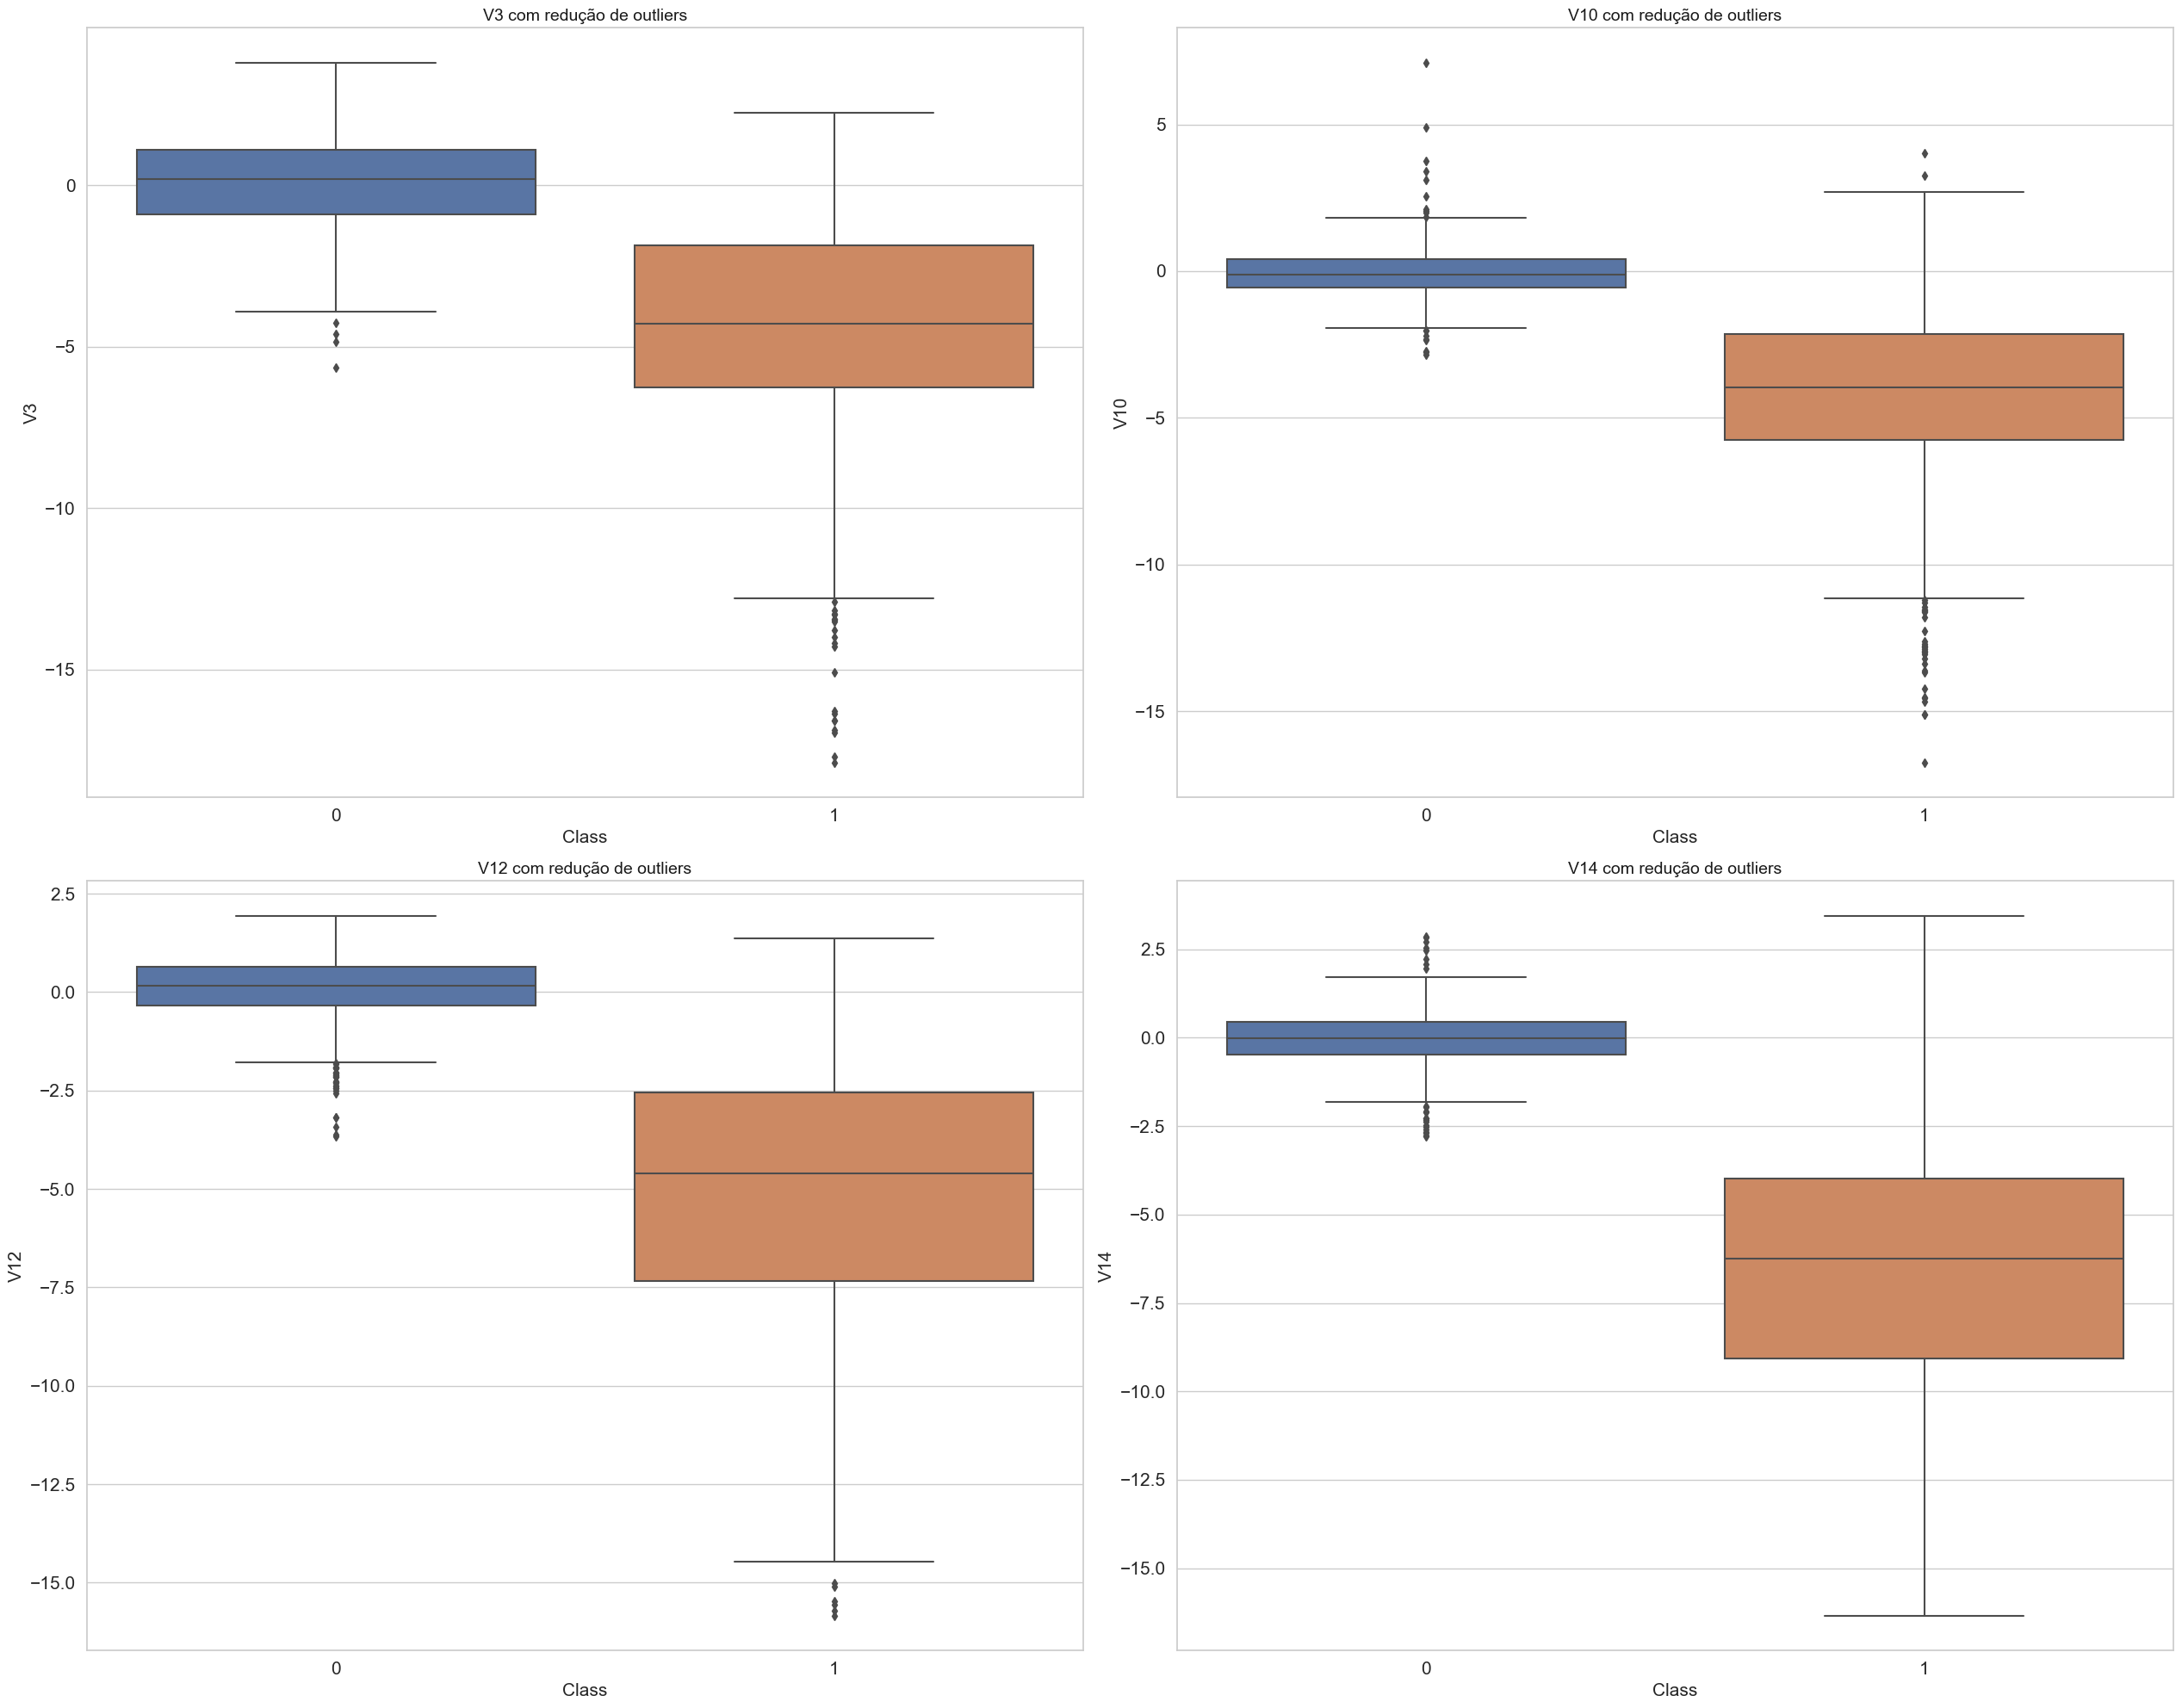

In [36]:
f, ax = plt.subplots(2,2, figsize=(25.5, 20))

sns.boxplot(x="Class", y="V3", data=data_novos,ax=ax[0][0])
ax[0][0].set_title("V3 com redução de outliers", fontsize=14)

sns.boxplot(x="Class", y="V10", data=data_novos,ax=ax[0][1])
ax[0][1].set_title("V10 com redução de outliers", fontsize=14)

sns.boxplot(x="Class", y="V12", data=data_novos,ax=ax[1][0])
ax[1][0].set_title("V12 com redução de outliers", fontsize=14)

sns.boxplot(x="Class", y="V14", data=data_novos,ax=ax[1][1])
ax[1][1].set_title("V14 com redução de outliers", fontsize=14)

plt.tight_layout()

Após o procedimento de remoção de outliers, é possível observar que ainda há presença de outliers, porém em uma quantidade significativamente menor. Além disso, os valores máximos e mínimos agora estão mais condizentes com a distribuição original dos dados, refletindo uma representação mais fidedigna das variáveis.

Para a próxima etapa, empregaremos três modelos de redução de dimensionalidade com o objetivo de tentar discernir entre as transações com fraude e sem fraude, com base em seus padrões distintos. Os modelos escolhidos são o t-SNE (t-distributed Stochastic Neighbor Embedding), conhecido por sua eficácia mesmo em amostras pequenas, além do PCA (Principal Component Analysis) e o TruncatedSVD (Truncated Singular Value Decomposition).

## 1.7) Técnica de dimensionalidade dados 

In [37]:
# Divisão dados 
x = data_novos.drop("Class", axis=1).values
y = data_novos["Class"].values

In [38]:
%%time

# Importando biblioteca
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
import matplotlib.patches as mpatches

# Modelo t_SNE
model_reduzido_tsne = TSNE(n_components=2, random_state=42).fit_transform(x)

# Modelo PCA
model_reduzido_pca = PCA(n_components=2, random_state=42).fit_transform(x)

# Modelo SVD
model_reduzido_svd = TruncatedSVD(n_components=2,
                                  algorithm='randomized',
                                  random_state=42).fit_transform(x)

CPU times: total: 17.9 s
Wall time: 1.88 s


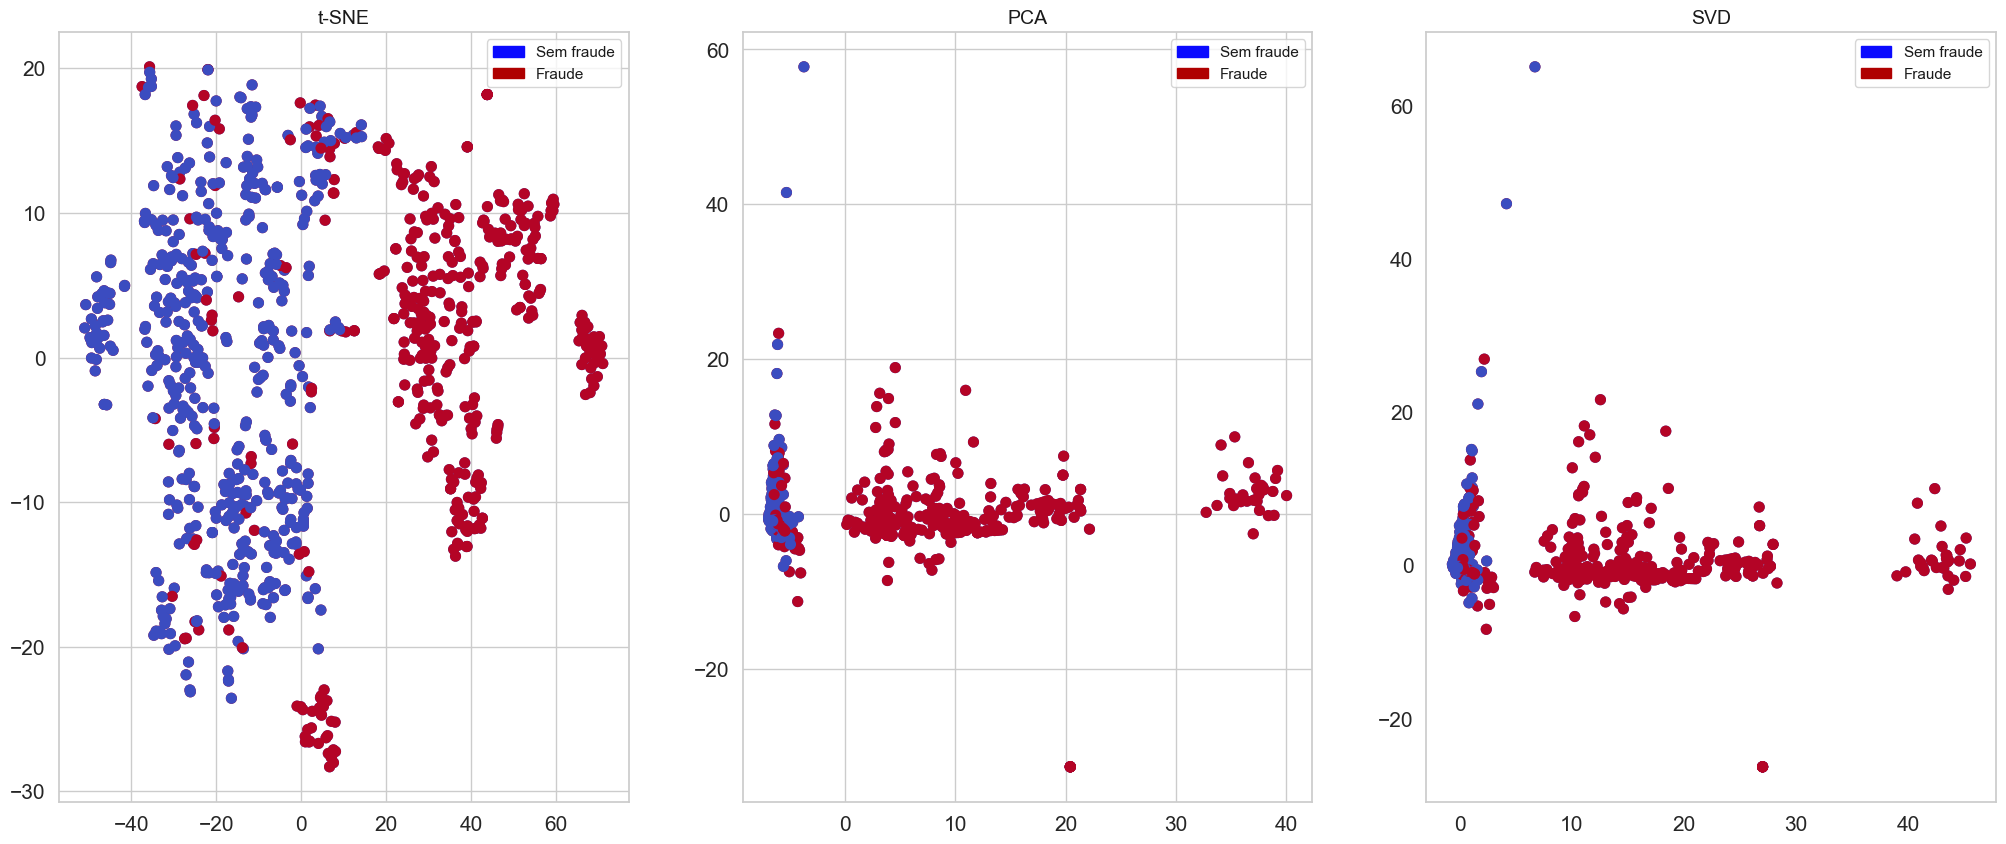

In [39]:
# Gráfico de risco de fraude credito

azul = mpatches.Patch(color='#0A0AFF', label='Sem fraude')
vermelho = mpatches.Patch(color='#AF0000', label='Fraude')

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(25, 10))

ax1.scatter(model_reduzido_tsne[:,0], model_reduzido_tsne[:,1], c=(y == 0), cmap='coolwarm', label='Sem fraude', linewidths=2)
ax1.scatter(model_reduzido_tsne[:,0], model_reduzido_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraude', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)
ax3.grid(False)
ax1.legend(handles=[azul, vermelho])

ax2.scatter(model_reduzido_pca[:,0], model_reduzido_pca[:,1], c=(y == 0), cmap='coolwarm', label='Sem fraude', linewidths=2)
ax2.scatter(model_reduzido_pca[:,0], model_reduzido_pca[:,1], c=(y == 1), cmap='coolwarm', label='Fraude', linewidths=2)
ax2.set_title('PCA', fontsize=14)
ax3.grid(False)
ax2.legend(handles=[azul, vermelho])

ax3.scatter(model_reduzido_svd[:,0], model_reduzido_svd[:,1], c=(y == 0), cmap='coolwarm', label='Sem fraude', linewidths=2)
ax3.scatter(model_reduzido_svd[:,0], model_reduzido_svd[:,1], c=(y == 1), cmap='coolwarm', label='Fraude', linewidths=2)
ax3.set_title('SVD', fontsize=14)
ax3.grid(False)
ax3.legend(handles=[azul, vermelho])

PCA, ou Análise de Componentes Principais (Principal Component Analysis), é uma técnica estatística usada para reduzir a dimensionalidade dos dados, preservando ao máximo a variação presente nos dados originais. Seu principal objetivo é encontrar um conjunto de novas variáveis, chamadas de componentes principais, que são combinações lineares das variáveis originais.

O PCA realiza essa transformação de modo que o primeiro componente principal capture a maior variação nos dados. Cada componente subsequente captura a máxima variação restante, com a restrição de ser ortogonal aos componentes anteriores.

Essa técnica é valiosa para análise e compressão de dados, permitindo reduzir a quantidade de dimensões (ou variáveis) em um conjunto de dados, o que pode simplificar a análise, remover a redundância nos dados e acelerar os algoritmos de machine learning ao lidar com conjuntos de dados grandes.

O PCA é muito usado na área de aprendizado de máquina para a visualização de dados de alta dimensão e também como uma etapa de pré-processamento para reduzir a dimensionalidade antes de aplicar modelos de machine learning, mantendo ao mesmo tempo as informações mais relevantes do conjunto de dados original.

Das visualizações das aglomerações (resultantes do PCA, TSNE e TruncatedSVD), é possível identificar certa separação entre os diferentes tipos de transações. Essa separação indica que os padrões subjacentes das transações com fraude e as transações legítimas têm características distintas, possibilitando uma diferenciação entre elas.

Essa identificação visual das aglomerações é um indicativo promissor de que os modelos de redução de dimensionalidade estão conseguindo capturar e representar de maneira eficaz as nuances presentes nos dados, permitindo uma diferenciação entre os diferentes tipos de transações com base em seus padrões.

# Segunda técnica de classes desembalecandas

## 1.8.1) Pré-processamento padronizar dados

- O StandardScaler calcula a média e o desvio padrão de cada característica e, em seguida, subtrai a média de cada valor e divide pelo desvio padrão. Isso garante que os dados resultantes estejam na mesma escala, centrados em torno de 0 e com variância unitária, facilitando a interpretação e o desempenho dos modelos de machine learning.

In [40]:
# Importando biblioteca
from sklearn.preprocessing import StandardScaler

# Criando um objeto
pre_standard_scaler = StandardScaler()

# Treinamento
data['Amount_norm'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))

# Criando coluna nova dataframe
data = data.drop(['Time', 'Amount'], axis=1)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,Amount_norm
160163,2.102193,-0.139685,-1.660117,0.086818,0.328084,-0.620069,0.055209,-0.168680,0.972639,-0.069651,-1.298369,-0.507233,-1.141529,0.707315,1.119025,-0.136967,-0.579721,0.321406,-0.082985,-0.300300,0.227082,0.749461,-0.018255,0.256768,0.352469,-0.417803,-0.002102,-0.054604,0,-0.349231
255030,-0.397449,-0.106954,0.724453,-2.333869,0.558527,-0.632617,0.240103,-0.073371,-1.047242,-0.214693,-1.325332,-0.939580,0.123590,-0.403457,-0.744601,1.151875,-0.148031,-1.272938,0.121927,0.079806,0.258996,0.595709,-0.230832,0.495659,0.065083,-0.289636,0.088810,0.142799,0,-0.333439
134563,1.050605,0.011470,0.277053,0.205095,0.598279,1.580015,-0.348249,0.534956,-0.286308,-0.103628,2.228317,1.589494,0.719532,0.436083,1.390974,-0.692380,0.379557,-1.943024,-1.258348,-0.170826,-0.101075,-0.158467,0.202971,-1.328806,-0.066182,0.223883,0.040909,-0.007713,0,-0.337477
120253,1.229644,0.173073,0.032109,0.667400,0.350827,0.554975,-0.156605,0.237571,-0.010503,0.131965,0.413045,0.211459,-0.698889,0.660543,0.768949,0.514628,-0.831212,0.194303,0.089625,-0.182245,-0.239103,-0.726548,-0.011707,-1.210143,0.394397,-0.543161,0.030593,0.002132,0,-0.349231
237156,-1.116489,2.022495,-0.861618,-0.605763,0.223596,-1.129582,0.713310,0.167781,0.347838,0.681246,-0.472816,0.887475,1.259979,0.219661,0.354354,-0.545958,-0.302466,-0.101158,-0.222442,0.486510,0.327727,1.355593,0.032344,1.201770,-0.549028,-0.262740,0.807786,0.513775,0,-0.348072


In [41]:
# Divisão dados para smote
x = np.array(data.iloc[:, data.columns != 'Class'])
y = np.array(data.iloc[:, data.columns == 'Class'])

print('Visualizando dados x: {}'.format(x.shape))
print('Visualizando dados y: {}'.format(y.shape))

Visualizando dados x: (284807, 29)
Visualizando dados y: (284807, 1)


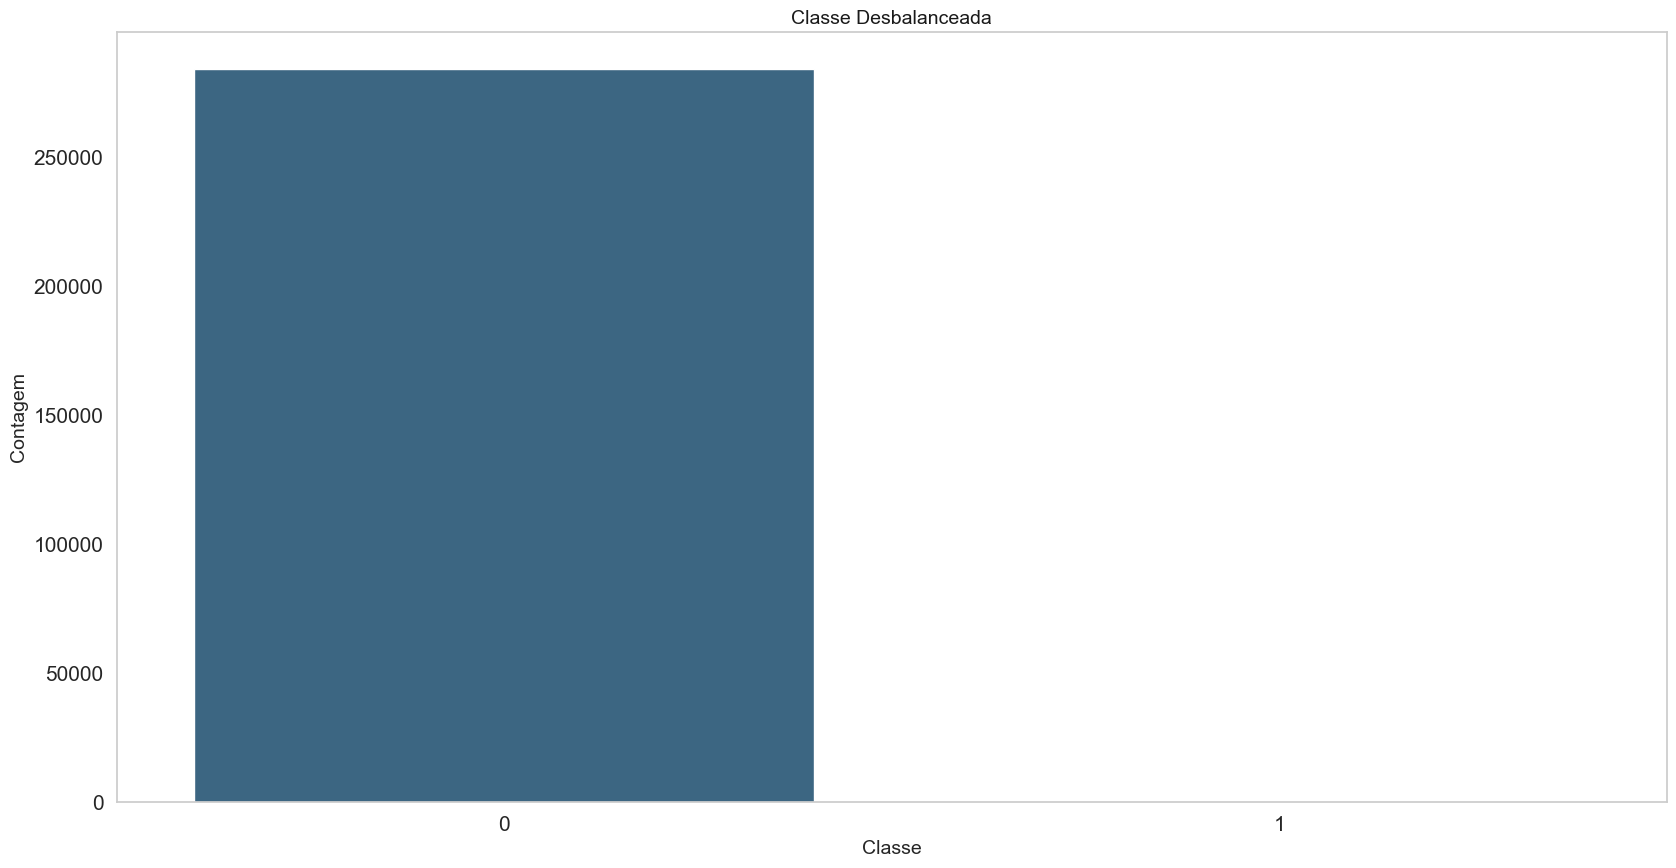

In [42]:
# Visuaizando dados sem classes palette='viridis'
sns.countplot(x='Class', data=data, palette='viridis')
plt.xlabel('Classe', fontsize=14)
plt.ylabel('Contagem', fontsize=14)
plt.title("Classe Desbalanceada", fontsize=14)
plt.grid(False)

## 1.8.2) SMOTE significa Synthetic Minority Over-sampling Technique - Técnica de reamostragem dados desbalanceados.

Uma abordagem comum para lidar com conjuntos de dados desbalanceados é o uso do SMOTE (Synthetic Minority Over-sampling Technique). Esta técnica é amplamente empregada na resolução de problemas relacionados à disparidade entre classes. O SMOTE atua gerando artificialmente exemplos da classe minoritária, aumentando sua representação no conjunto de dados. Ao sintetizar novas instâncias a partir das existentes, o SMOTE equilibra a distribuição das classes, permitindo que modelos de machine learning capturem melhor os padrões subjacentes dos dados, especialmente em situações em que a classe minoritária é crucial para a análise e tomada de decisões assertivas.

In [43]:
# Importando biblioteca
from sklearn.model_selection import train_test_split

# Treianmento da classes desbalanceada
X_train, X_test, y_train, y_test = train_test_split(x, 
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=0)

print("Transações numéricas X_train dataset: ", X_train.shape)
print("Transações numéricas y_train dataset: ", y_train.shape)
print("Transações numéricas X_test dataset: ", X_test.shape)
print("Transações numéricas y_test dataset: ", y_test.shape)

Transações numéricas X_train dataset:  (199364, 29)
Transações numéricas y_train dataset:  (199364, 1)
Transações numéricas X_test dataset:  (85443, 29)
Transações numéricas y_test dataset:  (85443, 1)


In [44]:
# Importando biblioteca
from imblearn.over_sampling import SMOTE

# Visualizando dados desbalanceada
print("Antes do Sobreamostragem, contagens do rótulo '1': {}".format(sum(y_train == 1)))
print("Antes do Sobreamostragem, contagens do rótulo '0': {} \n".format(sum(y_train == 0)))
print('-' * 100)

# Aplicando técnica SMOTE
pre_smote = SMOTE(random_state=2)
x_train_resp, y_train_resp = pre_smote.fit_resample(X_train, y_train.ravel())

print("Visualizando dados balanceados")
print('Após a Sobreamostragem, linhas colunas treinamento x: {}'.format(x_train_resp.shape))
print('Após a Sobreamostragem, linhas colunas treinamento y: {} \n'.format(y_train_resp.shape))
print("Após a Sobreamostragem, colunas '1': {}".format(sum(y_train_resp == 1)))
print("Após a Sobreamostragem, colunas '0': {}".format(sum(y_train_resp == 0)))

Antes do Sobreamostragem, contagens do rótulo '1': [340]
Antes do Sobreamostragem, contagens do rótulo '0': [199024] 

----------------------------------------------------------------------------------------------------
Visualizando dados balanceados
Após a Sobreamostragem, linhas colunas treinamento x: (398048, 29)
Após a Sobreamostragem, linhas colunas treinamento y: (398048,) 

Após a Sobreamostragem, colunas '1': 199024
Após a Sobreamostragem, colunas '0': 199024


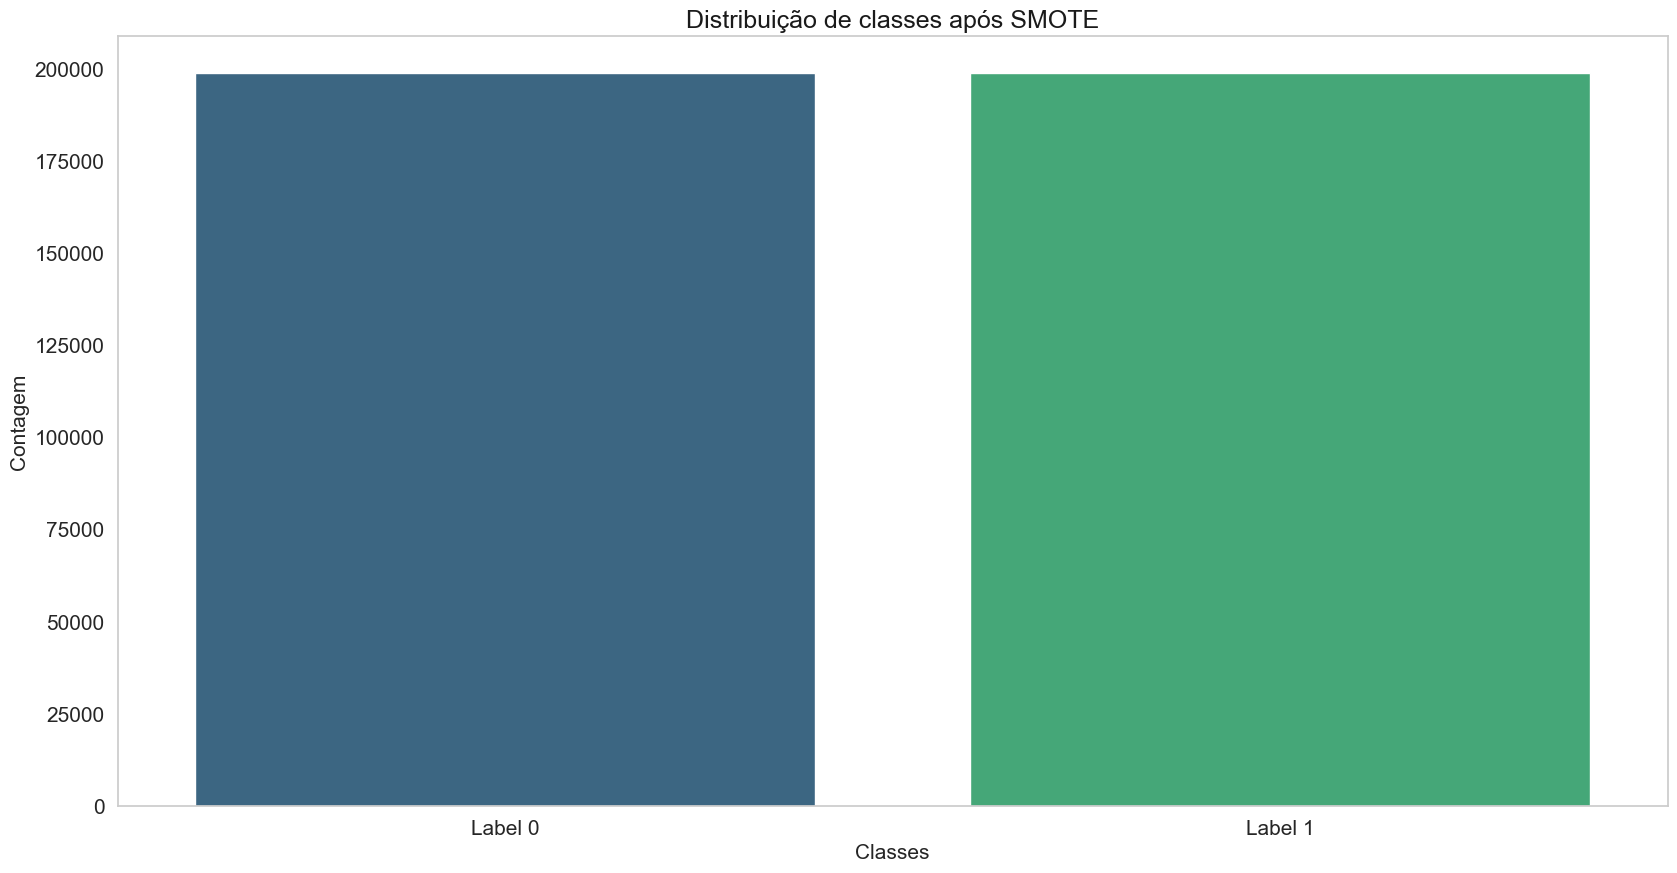

In [45]:
# Visualizando em grafico dados "Após a Sobreamostragem"

count_0 = sum(y_train_resp == 0)
count_1 = sum(y_train_resp == 1)

data = {'Class': ['Label 0', 'Label 1'], 
        'Count': [count_0, count_1]}

df = pd.DataFrame(data)

sns.barplot(x='Class', y='Count', data=df, palette='viridis')
plt.title('Distribuição de classes após SMOTE',fontsize=18)
plt.xlabel("Classes")
plt.ylabel("Contagem")
plt.grid(False)
plt.show()

## 1.9) Divisão treino teste

In [46]:
# Divisão dados 
x1 = data_novos.drop("Class", axis=1).values
y2 = data_novos["Class"].values

In [47]:
# Visualizando dados x
x1.shape

(906, 30)

In [48]:
# Visualizando dados y
y2.shape

(906,)

In [49]:
# Visualizando dados coluna alvo
data_novos.Class.value_counts()

0    490
1    416
Name: Class, dtype: int64

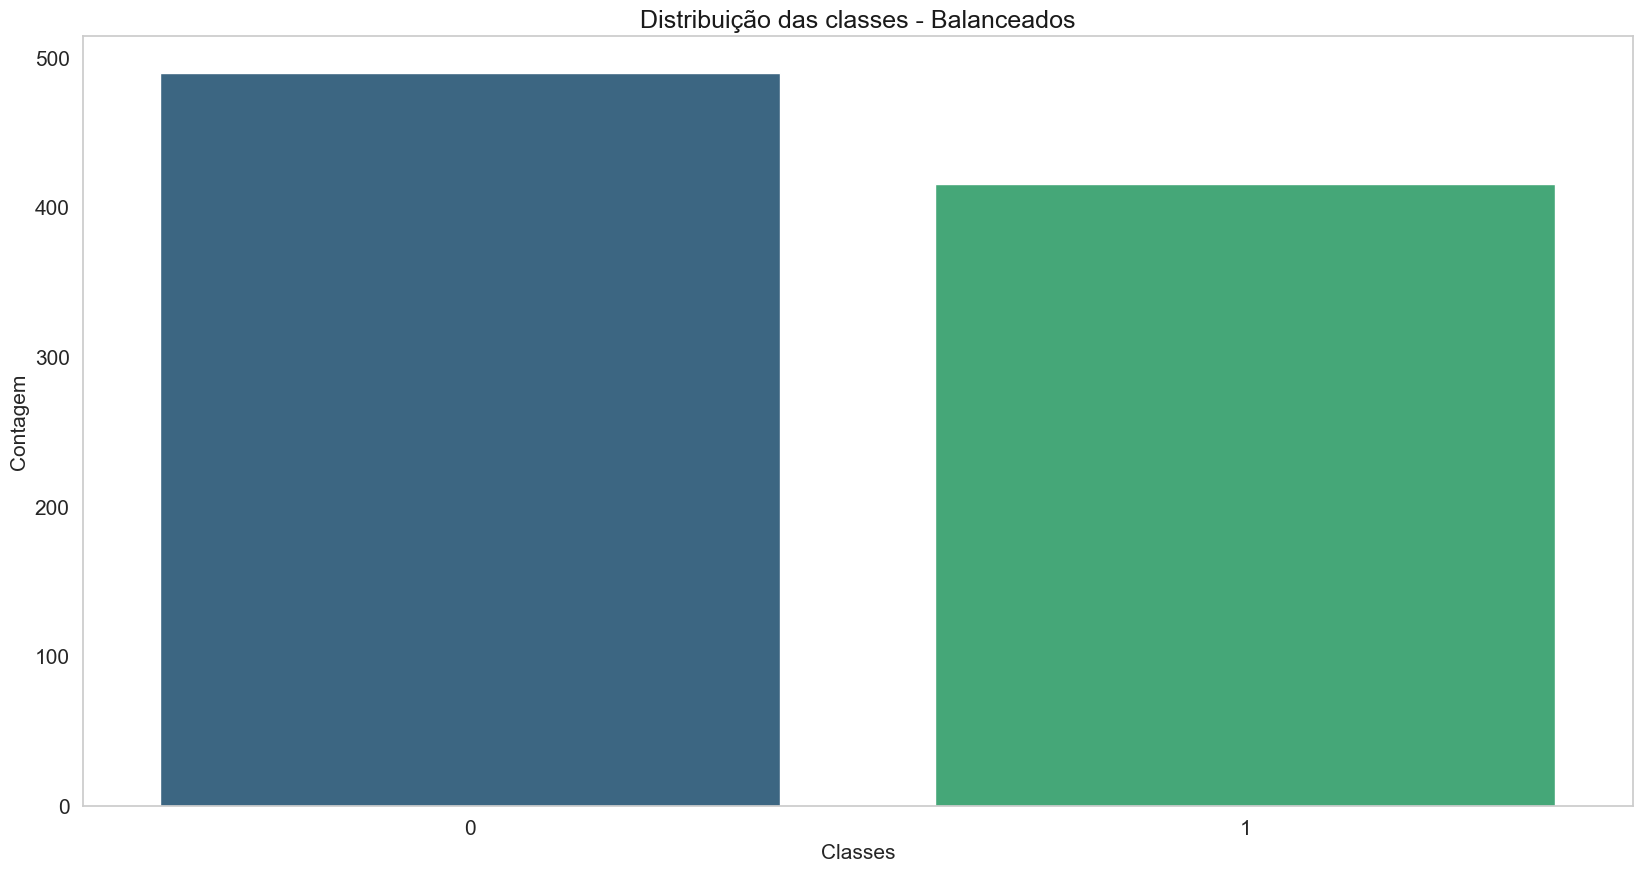

In [50]:
# Grafico barra coluna alvo
sns.countplot(x="Class", data=data_novos, palette='viridis')
plt.title('Distribuição das classes - Balanceados',fontsize=18)
plt.xlabel("Classes")
plt.ylabel("Contagem")
plt.grid(False)
plt.show()

## 2.0) Treinamento modelo

Treino e teste são duas etapas fundamentais no desenvolvimento de modelos de aprendizado de máquina (machine learning) e em outras técnicas estatísticas. Essas etapas são usadas para avaliar a capacidade de generalização do modelo e medir seu desempenho em dados não vistos anteriormente.

A divisão entre treino e teste é necessária para evitar que o modelo memorize os dados de treinamento (overfitting) e não consiga generalizar bem para novos dados. Aqui está uma explicação detalhada sobre cada etapa:

A) Treinamento: Durante a etapa de treinamento, o modelo é alimentado com um conjunto de dados denominado conjunto de treinamento. Esse conjunto contém exemplos rotulados, onde as entradas (características) estão associadas a um rótulo conhecido (resultado esperado). O modelo usa esses exemplos para aprender os padrões e relações presentes nos dados e ajustar seus parâmetros internos. O objetivo do treinamento é encontrar os melhores parâmetros do modelo que minimizem a diferença entre as previsões do modelo e os rótulos conhecidos. Isso é feito por meio de algoritmos de otimização que ajustam gradualmente os parâmetros com base nas diferenças (erros) entre as previsões e os rótulos conhecidos.

B) Teste: Após o treinamento, é necessário avaliar o desempenho do modelo em dados não vistos anteriormente. Para isso, utiliza-se um conjunto de dados separado chamado conjunto de teste. Esse conjunto também contém exemplos rotulados, mas o modelo não teve acesso a eles durante o treinamento. O conjunto de teste é usado para fazer previsões com o modelo treinado e comparar essas previsões com os rótulos conhecidos. Isso permite medir a capacidade de generalização do modelo e avaliar seu desempenho em dados desconhecidos. Métricas como precisão, acurácia, recall e F1-score são comumente utilizadas para avaliar o desempenho do modelo durante a fase de teste.

É importante destacar que o conjunto de teste é usado apenas para avaliação final do modelo, não para ajustar seus parâmetros. A divisão entre conjunto de treinamento e conjunto de teste ajuda a estimar o desempenho esperado do modelo em situações reais, onde dados não rotulados estão disponíveis.

Além do treinamento e teste, é comum também utilizar uma terceira etapa chamada de validação. Nessa etapa, um conjunto de dados separado chamado conjunto de validação é utilizado para ajustar os hiperparâmetros do modelo, como taxa de aprendizado, número de camadas, tamanho do batch, etc. A validação auxilia na seleção dos melhores hiperparâmetros antes de finalizar o treinamento e avaliar o modelo no conjunto de teste.

A separação adequada entre treino, validação e teste é crucial para garantir uma avaliação justa e confiável do desempenho do modelo, além de evitar problemas de overfitting e subestimação de resultados.

In [51]:
# Importando biblioteca
from sklearn.model_selection import train_test_split

# Treinamento dados
X_treino, X_teste, Y_treino, Y_teste = train_test_split(x1,
                                                        y2,
                                                        test_size=0.2,
                                                        random_state=42)

In [52]:
# Visualizando dados treino
X_treino.shape

(724, 30)

In [53]:
# Visualizando dados test
Y_treino.shape

(724,)

## 2.1) Modelo machine learning

Um modelo de machine learning é um algoritmo ou conjunto de algoritmos que é treinado para realizar tarefas específicas, como classificação, regressão, clustering ou previsão, com base em dados. Esses modelos são uma parte fundamental da inteligência artificial e da aprendizagem de máquina, que são campos da informática que se concentram em criar sistemas que podem aprender e tomar decisões com base em dados, em vez de serem explicitamente programados para realizar tarefas.

A ideia central por trás dos modelos de machine learning é que eles podem aprender a partir de exemplos e dados, em vez de depender de regras e programação explícita. Os modelos de machine learning são alimentados com conjuntos de dados de treinamento, nos quais eles procuram padrões e relações entre os dados. Depois de treinados, esses modelos podem ser usados para fazer previsões ou tomar decisões com base em novos dados.

Existem vários tipos de modelos de machine learning, incluindo:

Modelos de regressão: usados para prever valores numéricos a partir de dados, como prever preços de ações ou a temperatura.

Modelos de classificação: usados para atribuir categorias ou rótulos a dados, como classificar e-mails como spam ou não spam.

Modelos de clustering: usados para agrupar dados em clusters com base em semelhanças, como identificar grupos de consumidores com comportamentos semelhantes.

Modelos de aprendizagem profunda (deep learning): uma subárea da aprendizagem de máquina que usa redes neurais artificiais com várias camadas para lidar com dados complexos, como imagens e texto.

Os modelos de machine learning são aplicados em uma ampla variedade de campos, incluindo medicina, finanças, marketing, visão computacional, processamento de linguagem natural e muito mais. Eles têm a capacidade de automatizar tarefas, melhorar a tomada de decisões e extrair informações úteis a partir de grandes volumes de dados.

Modelo machine learning 1 - Regressão logística
Definição modelo regressão logística

A regressão logística é um algoritmo de aprendizado de máquina supervisionado usado para realizar análise de classificação binária. Apesar do nome "regressão", a regressão logística é geralmente usada para problemas de classificação, onde o objetivo é prever a probabilidade de uma instância pertencer a uma das duas classes possíveis.

A regressão logística é adequada quando a variável dependente é binária (duas classes), como por exemplo, prever se um e-mail é spam ou não spam, se um paciente tem uma determinada doença ou não, se um cliente fará uma compra ou não, entre outros cenários.

O funcionamento da regressão logística é baseado em um modelo matemático que relaciona as variáveis independentes (características) a uma probabilidade estimada de pertencer a uma das classes. Essa probabilidade é calculada usando a função logística, também conhecida como função sigmoid:

f(x) = 1 / (1 + e ^ (-x))

Nesse contexto, a regressão logística estima os coeficientes (pesos) que multiplicam as características de entrada e as soma ponderadamente para calcular o valor do logito. O logito é então passado pela função sigmoid para obter uma probabilidade entre 0 e 1.

Durante o treinamento do modelo de regressão logística, os coeficientes são ajustados por meio de um processo iterativo, usando técnicas de otimização como a descida de gradiente (gradient descent), com o objetivo de minimizar a diferença entre as probabilidades previstas e os rótulos reais dos dados de treinamento.

Após o treinamento, o modelo de regressão logística é capaz de fazer previsões para novos exemplos, atribuindo uma probabilidade de pertencer a cada uma das classes. É comum usar um limiar (threshold) para tomar uma decisão final de classificação: se a probabilidade estimada for superior ao limiar, a instância é classificada como pertencente à classe positiva; caso contrário, é classificada como pertencente à classe negativa.

A regressão logística é amplamente utilizada em diferentes áreas, incluindo ciência de dados, medicina, marketing, finanças e muitas outras, devido à sua simplicidade, interpretabilidade e bom desempenho em problemas de classificação binária. Além disso, a regressão logística pode ser estendida para problemas de classificação multiclasse usando técnicas como a regressão logística multinomial ou a regressão logística ordinal.

Para avançar na análise, iremos testar e comparar a performance de diferentes modelos de machine learning, incluindo regressão logística, Support Vector Classifier (SVC), Árvore de Decisão e Floresta Aleatória. Essa abordagem nos permitirá avaliar a capacidade preditiva e a eficácia de cada algoritmo na classificação das transações com base nos padrões identificados anteriormente.

A utilização de múltiplos modelos nos proporcionará uma visão abrangente sobre a adequação de cada método na tarefa de identificação de transações fraudulentas, permitindo-nos selecionar o modelo mais adequado com base em métricas de desempenho como precisão, recall, F1-score e outras métricas relevantes.

In [56]:
%%time

# Importando bibliotecas
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

modelos = {
    "Regressao Logistica": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "SVC": SVC(),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "RDC" : RandomForestClassifier()
}

for nome, modelo in modelos.items():
    modelo.fit(X_treino, Y_treino)
    score_treino = cross_val_score(modelo, X_treino, Y_treino, cv=5)
    print("Modelo: ",
          modelo.__class__.__name__,
          "possui acuracia",
          round(score_treino.mean(), 2) * 100, "%")

Modelo:  LogisticRegression possui acuracia 94.0 %
Modelo:  KNeighborsClassifier possui acuracia 94.0 %
Modelo:  SVC possui acuracia 93.0 %
Modelo:  DecisionTreeClassifier possui acuracia 90.0 %
Modelo:  RandomForestClassifier possui acuracia 94.0 %
CPU times: total: 93.8 ms
Wall time: 2.39 s


Após a análise inicial, notamos que os modelos de regressão logística, KNN, SVC e RFC apresentaram acurácias semelhantes. Com o intuito de aprimorar ainda mais o desempenho desses modelos, planejamos realizar um refinamento por meio do GridSearchCV.

Essa técnica nos permitirá otimizar cada um desses modelos, explorando e testando várias combinações de parâmetros para encontrar as configurações mais adequadas. O GridSearchCV é uma ferramenta valiosa que varre exaustivamente todas as opções de parâmetros disponíveis para cada modelo, permitindo-nos identificar a melhor combinação de parâmetros que resulte em um desempenho aprimorado em termos de métricas de avaliação, como acurácia, precisão, recall, entre outras

In [57]:
# Parametros modelo 
# Modelo 1 - Logistic Regression
log_reg_params = {"penalty": ['l1', 'l2'], 
                  'C': [0.001, 
                        0.01, 
                        0.1, 
                        1, 
                        10, 
                        100, 
                        1000]}

# Parâmetros modelo
grid_log_reg = GridSearchCV(LogisticRegression(), 
                            log_reg_params)

# Treinamento modelo
grid_log_reg.fit(X_treino, 
                 Y_treino)

# Best_estimator
log_reg = grid_log_reg.best_estimator_

# Score modelo
log_reg_score = cross_val_score(log_reg, X_treino, Y_treino, cv=5)


# Modelo 2 - KNN
# Parametros modelo
knears_params = {"n_neighbors": list(range(2,5,1)), 
                 'algorithm': ['auto', 
                               'ball_tree', 
                               'kd_tree', 
                               'brute']}

# Modelo KNN
grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)

# Treinamento modelo
grid_knears.fit(X_treino, Y_treino)

# Best_estimator
knears_neighbors = grid_knears.best_estimator_

# Score modelo
knears_score = cross_val_score(knears_neighbors, X_treino, Y_treino, cv=5)

# Modelo 3 - SVC
# Parametros modelo
svc_params = {'C': [0.5, 
                    0.7, 
                    0.9, 
                    1], 
              'kernel': ['rbf', 
                         'poly', 
                         'sigmoid', 
                         'linear']}

# Parâmetros modelo
grid_svc = GridSearchCV(SVC(), svc_params)

# Treinamento modelo
grid_svc.fit(X_treino, Y_treino)

# Best_estimator
svc = grid_svc.best_estimator_

# Validação cruzada
svc_score = cross_val_score(svc, X_treino, Y_treino, cv=5)


# Modelo 4 - Decision Tree
# Parâmetros modelo
tree_params = {"criterion": ["gini", "entropy"],
                         "max_depth": list(range(2,10,1)),
                         "min_samples_leaf": list(range(3,10,1))}

# Modelo Decision Tree
grid_tree = GridSearchCV(DecisionTreeClassifier(), 
                         tree_params,n_jobs=-1)

# Treinamento modelo
grid_tree.fit(X_treino, Y_treino)

# Best_estimator
tree_clf = grid_tree.best_estimator_

# Validação cruzada
tree_score = cross_val_score(tree_clf, X_treino, Y_treino, cv=5)

## Modelo 5 - RandomForest

# Parâmetros modelo
tree_params = {"criterion": ["gini", "entropy"],
                        "max_depth": list(range(2,10,1)),
                         "min_samples_leaf": list(range(5,10,1))}

# Modelo Random Forest
grid_tree = GridSearchCV(RandomForestClassifier(),
                                          tree_params,n_jobs=-1)

# Treinamento modelo
grid_tree.fit(X_treino, Y_treino)

# Best_estimator
tree_clf = grid_tree.best_estimator_

# Validação cruzada
rfc_score = cross_val_score(tree_clf, X_treino, Y_treino, cv=5)

print('Score Regressao Logistica Validacao Cruzada: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')
print('Score KNN Validacao Cruzada: ', round(knears_score.mean() * 100, 2).astype(str) + '%')
print('Score SVC Validacao Cruzada: ', round(svc_score.mean() * 100, 2).astype(str) + '%')
print('Score DTC Validacao Cruzada: ', round(tree_score.mean() * 100, 2).astype(str) + '%')
print('Score RFC Validacao Cruzada: ', round(rfc_score.mean() * 100, 2).astype(str) + '%')

Score Regressao Logistica Validacao Cruzada:  94.2%
Score KNN Validacao Cruzada:  93.37%
Score SVC Validacao Cruzada:  93.51%
Score DTC Validacao Cruzada:  92.54%
Score RFC Validacao Cruzada:  93.79%


A análise revelou uma notável melhoria no desempenho da regressão logística, destacando-a como o modelo mais eficaz para lidar com esse problema específico. Em sequência, a floresta aleatória também se destaca como uma escolha promissora, evidenciando uma performance consistente e competitiva na resolução desse desafio.

Esses resultados reforçam a superioridade da regressão logística como o modelo mais adequado para a detecção de transações fraudulentas, seguido de perto pela floresta aleatória. Essa distinção entre os modelos reforça a importância de escolher cuidadosamente o modelo apropriado, considerando sua capacidade de identificar eficazmente transações suspeitas.

# 2.2) Sub amostras para validação


In [58]:
# Divisão dados sub_amostra
X_subamostra = data_novos.drop('Class', axis=1)
Y_subamostra = data_novos['Class']

# Fazendo divisão dados
for indice_treino, indice_teste in stratified_k_fold.split(X_subamostra, Y_subamostra):
    print("Treino:", indice_treino, "Teste:", indice_teste)
    X_treino_subamostra, X_teste_subamostra = X_subamostra.iloc[indice_treino], X_subamostra.iloc[indice_teste]
    Y_treino_subamostra, Y_teste_subamostra = Y_subamostra.iloc[indice_treino], Y_subamostra.iloc[indice_teste]

print('-' * 100)

# Visualização dados
X_treino_subamostra = X_treino_subamostra.values
X_teste_subamostra = X_teste_subamostra.values
Y_treino_subamostra = Y_treino_subamostra.values
Y_teste_subamostra = Y_teste_subamostra.values

Treino: [180 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199
 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217
 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235
 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253
 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271
 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287 288 289
 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305 306 307
 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323 324 325
 326 327 328 329 330 331 332 333 334 335 336 337 338 339 340 341 342 343
 344 345 346 347 348 349 350 351 352 353 354 355 356 357 358 359 360 361
 362 363 364 365 366 367 368 369 370 371 372 373 374 375 376 377 378 379
 380 381 382 383 384 385 386 387 388 389 390 391 392 393 394 395 396 397
 398 399 400 401 402 403 404 405 406 407 408 409 410 411 412 413 414 415
 416 417 418 419 420 421 422 423 424 425 42

Para equalizar as amostras e garantir a mesma quantidade para cada classe, estamos aplicando a técnica NearMiss. Esta estratégia visa selecionar um número correspondente de transações sem fraude, de forma a equilibrar a quantidade de exemplos em ambas as classes. O NearMiss é uma abordagem que seleciona exemplos da classe majoritária (transações não fraudulentas) com base na sua proximidade com os exemplos da classe minoritária (transações fraudulentas), garantindo que ambas as classes tenham quantidades comparáveis de dados para o treinamento dos modelos de machine learning.

# Curva ROC (Receiver Operating Characteristic)

A curva ROC (Receiver Operating Characteristic) é uma ferramenta importante para avaliar o desempenho de modelos de classificação, como a regressão logística. A curva ROC ilustra a capacidade de um modelo de distinguir entre classes positivas e negativas em diferentes pontos de corte.

In [59]:
# Importando bibliotecas geral
from collections import Counter
from sklearn.metrics import roc_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve
from imblearn.under_sampling import NearMiss
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, RandomizedSearchCV

# Crie uma instância do NearMiss
nm = NearMiss()

# Use o método fit_resample
X_nearmiss, Y_nearmiss = nm.fit_resample(X_subamostra.values,
                                         Y_subamostra.values)

# Amostra com Counter
contagem_nearmiss = Counter(Y_nearmiss)
print('Contagem NearMiss: {}'.format(contagem_nearmiss))

Contagem NearMiss: Counter({0: 416, 1: 416})


CPU times: total: 359 ms
Wall time: 1min 4s


<module 'matplotlib.pyplot' from 'C:\\Users\\rafae\\anaconda3\\envs\\anconda_jupyter_3_ml\\lib\\site-packages\\matplotlib\\pyplot.py'>

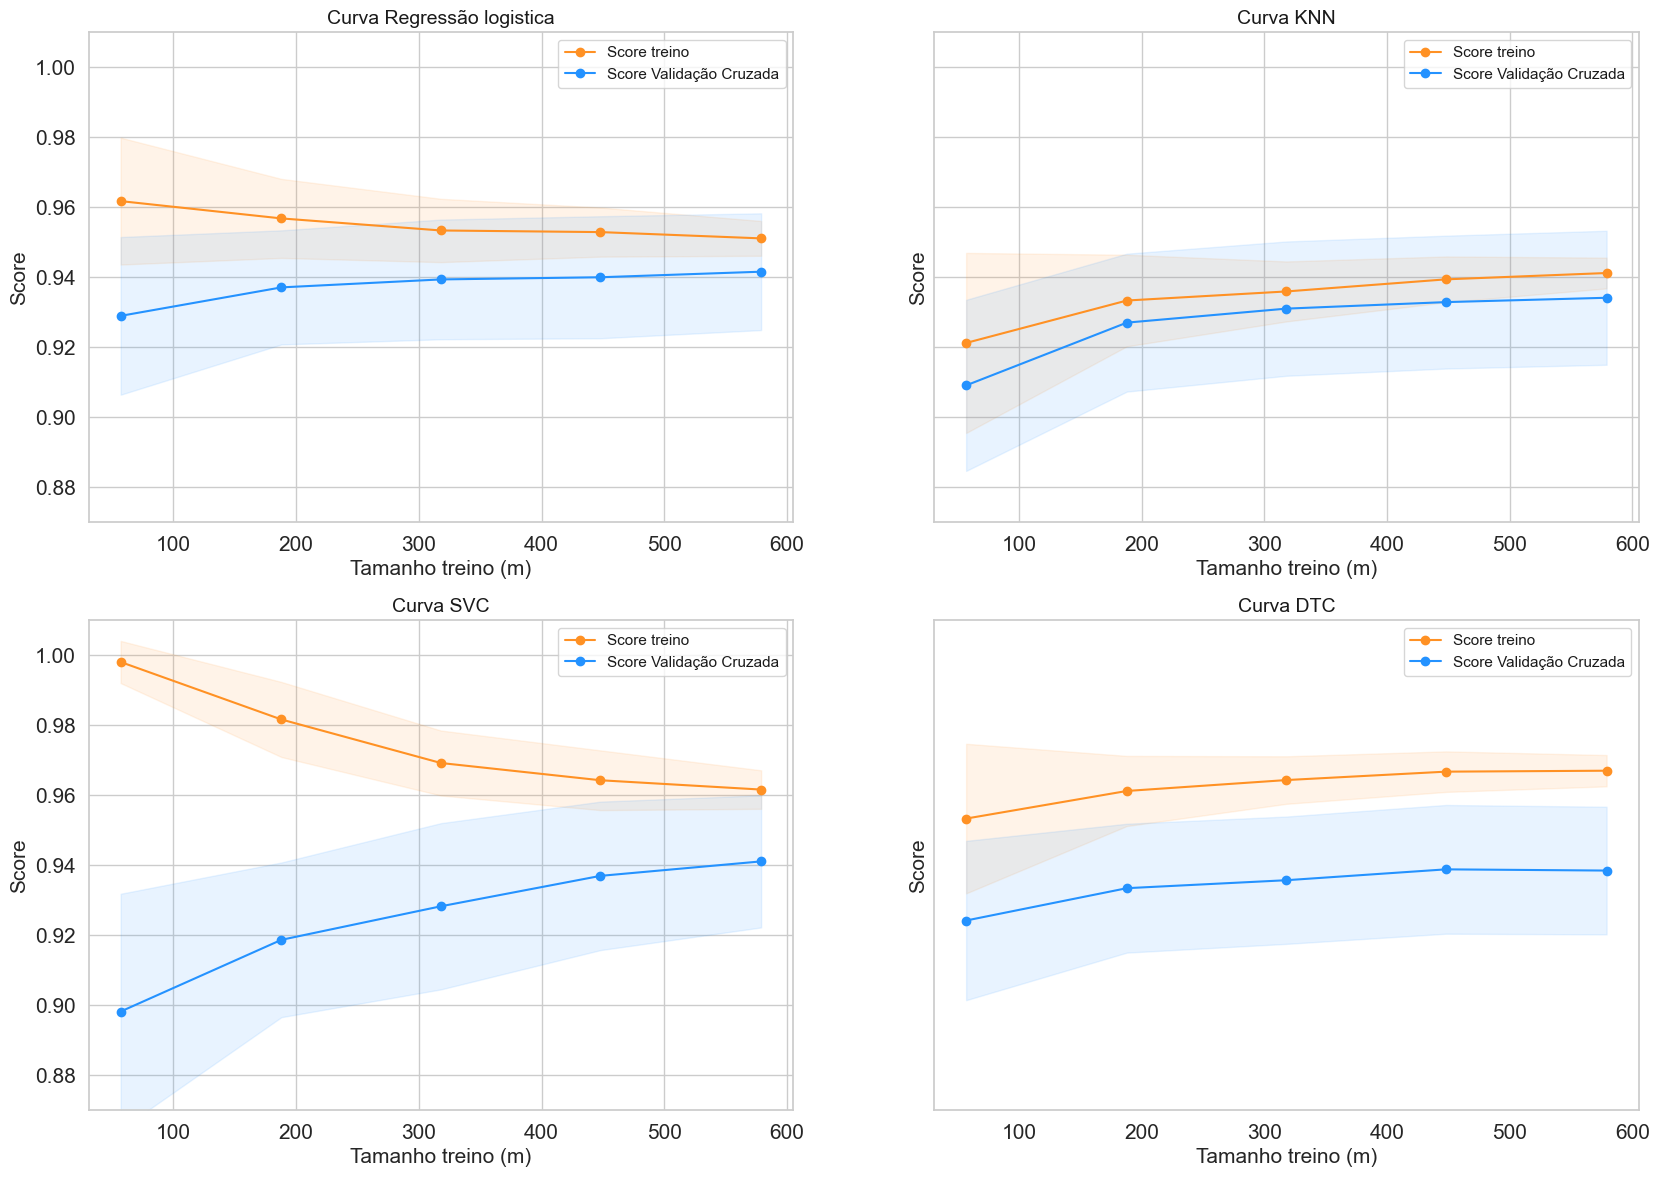

In [60]:
%%time

# Criando lista
acuracia_subamostra = []
precisao_subamostra = []
recall_subamostra = []
f1_subamostra = []
auc_subamostra = []


# Validação cruzada
for indice_treino, indice_teste in stratified_k_fold.split(X_treino_subamostra, Y_treino_subamostra):
    pipeline_subamostra = imbalanced_make_pipeline(NearMiss(sampling_strategy='majority'), log_reg)
    modelo_subamostra = pipeline_subamostra.fit(X_treino_subamostra[indice_treino], Y_treino_subamostra[indice_treino])
    previsao_subamostra = modelo_subamostra.predict(X_treino_subamostra[indice_teste])
    acuracia_subamostra.append(pipeline_subamostra.score(X_treino_subamostra[indice_teste], Y_treino_subamostra[indice_teste]))
    precisao_subamostra.append(precision_score(Y_treino_subamostra[indice_teste],previsao_subamostra))
    recall_subamostra.append(recall_score(Y_treino_subamostra[indice_teste],previsao_subamostra))
    f1_subamostra.append(f1_score(Y_treino_subamostra[indice_teste],previsao_subamostra))
    auc_subamostra.append(roc_auc_score(Y_treino_subamostra[indice_teste],previsao_subamostra))
    
# Criando função para plotar cruva roc
def plot_learning_curve(estimator1,
                        estimator2,
                        estimator3,
                        estimator4,
                        X,
                        Y,
                        ylim=None,
                        cv=None,
                        tamanho_treino=np.linspace(.1, 1.0, 5)):

    f, ax = plt.subplots(2,2, figsize=(20,14), sharey=True)

    if ylim is not None:
        plt.ylim(*ylim)

    tamanho_treino, score_treino, score_teste = learning_curve(estimator1, X, Y, cv=cv, train_sizes=tamanho_treino,n_jobs=2)
    media_score_treino = np.mean(score_treino, axis=1)
    std_score_treino = np.std(score_treino, axis=1)
    media_score_teste = np.mean(score_teste, axis=1)
    std_score_teste = np.std(score_teste, axis=1)

    ax[0][0].fill_between(tamanho_treino, media_score_treino - std_score_treino,
                     media_score_treino + std_score_treino, alpha=0.1,
                     color="#ff9124")

    ax[0][0].fill_between(tamanho_treino, media_score_teste - std_score_teste,
                     media_score_teste + std_score_teste, alpha=0.1, color="#2492ff")

    ax[0][0].plot(tamanho_treino, media_score_treino, 'o-', color="#ff9124", label="Score treino")
    ax[0][0].plot(tamanho_treino, media_score_teste, 'o-', color="#2492ff", label="Score Validação Cruzada")
    ax[0][0].set_title("Curva Regressão logistica", fontsize=14)
    ax[0][0].set_xlabel('Tamanho treino (m)')
    ax[0][0].set_ylabel('Score')
    ax[0][0].grid(True)
    ax[0][0].legend(loc="best")


    tamanho_treino, score_treino, score_teste = learning_curve(estimator2, X, Y, cv=cv, train_sizes=tamanho_treino,n_jobs=2)
    media_score_treino = np.mean(score_treino, axis=1)
    std_score_treino = np.std(score_treino, axis=1)
    media_score_teste = np.mean(score_teste, axis=1)
    std_score_teste = np.std(score_teste, axis=1)

    ax[0][1].fill_between(tamanho_treino, media_score_treino - std_score_treino,
                     media_score_treino + std_score_treino, alpha=0.1,
                     color="#ff9124")

    ax[0][1].fill_between(tamanho_treino, media_score_teste - std_score_teste,
                     media_score_teste + std_score_teste, alpha=0.1, color="#2492ff")

    ax[0][1].plot(tamanho_treino, media_score_treino, 'o-', color="#ff9124", label="Score treino")
    ax[0][1].plot(tamanho_treino, media_score_teste, 'o-', color="#2492ff", label="Score Validação Cruzada")
    ax[0][1].set_title("Curva KNN", fontsize=14)
    ax[0][1].set_xlabel('Tamanho treino (m)')
    ax[0][1].set_ylabel('Score')
    ax[0][1].grid(True)
    ax[0][1].legend(loc="best")


    tamanho_treino, score_treino, score_teste = learning_curve(estimator3, X, Y, cv=cv, train_sizes=tamanho_treino,n_jobs=2)
    media_score_treino = np.mean(score_treino, axis=1)
    std_score_treino = np.std(score_treino, axis=1)
    media_score_teste = np.mean(score_teste, axis=1)
    std_score_teste = np.std(score_teste, axis=1)

    ax[1][0].fill_between(tamanho_treino, media_score_treino - std_score_treino,
                     media_score_treino + std_score_treino, alpha=0.1,
                     color="#ff9124")

    ax[1][0].fill_between(tamanho_treino, media_score_teste - std_score_teste,
                     media_score_teste + std_score_teste, alpha=0.1, color="#2492ff")

    ax[1][0].plot(tamanho_treino, media_score_treino, 'o-', color="#ff9124", label="Score treino")
    ax[1][0].plot(tamanho_treino, media_score_teste, 'o-', color="#2492ff", label="Score Validação Cruzada")
    ax[1][0].set_title("Curva SVC", fontsize=14)
    ax[1][0].set_xlabel('Tamanho treino (m)')
    ax[1][0].set_ylabel('Score')
    ax[1][0].grid(True)
    ax[1][0].legend(loc="best")


    tamanho_treino, score_treino, score_teste = learning_curve(estimator4, X, Y, cv=cv, train_sizes=tamanho_treino,n_jobs=2)
    media_score_treino = np.mean(score_treino, axis=1)
    std_score_treino = np.std(score_treino, axis=1)
    media_score_teste = np.mean(score_teste, axis=1)
    std_score_teste = np.std(score_teste, axis=1)

    ax[1][1].fill_between(tamanho_treino, media_score_treino - std_score_treino,
                     media_score_treino + std_score_treino, alpha=0.1,
                     color="#ff9124")

    ax[1][1].fill_between(tamanho_treino, media_score_teste - std_score_teste,
                     media_score_teste + std_score_teste, alpha=0.1, color="#2492ff")

    ax[1][1].plot(tamanho_treino, media_score_treino, 'o-', color="#ff9124", label="Score treino")
    ax[1][1].plot(tamanho_treino, media_score_teste, 'o-', color="#2492ff", label="Score Validação Cruzada")
    ax[1][1].set_title("Curva DTC", fontsize=14)
    ax[1][1].set_xlabel('Tamanho treino (m)')
    ax[1][1].set_ylabel('Score')
    ax[1][1].grid(False)
    ax[1][1].legend(loc="best")

    return plt

# Visualiznado
cv = ShuffleSplit(n_splits=100,
                  test_size=0.2,
                  random_state=42)

# Visualizando cruva roc
plot_learning_curve(log_reg,
                    knears_neighbors,
                    svc,
                    tree_clf,
                    X_treino,
                    Y_treino,
                    (0.87, 1.01),
                    cv=cv)

Ao analisar as curvas de aprendizado, notamos que tanto a regressão logística quanto o SVC se destacam como os modelos mais promissores. As curvas indicam que esses modelos apresentam um bom equilíbrio entre viés e variância, demonstrando desempenho consistente à medida que a quantidade de dados de treinamento aumenta.

Esses resultados encorajadores nas curvas de aprendizado sugerem que a regressão logística e o SVC estão mais aptos a generalizar bem para conjuntos de dados maiores, mantendo uma performance estável e confiável. Essa análise nos permite direcionar nosso foco para esses modelos, buscando refiná-los ainda mais para obter o melhor desempenho possível.

## 2.3) Curva ROC

In [61]:
# Validação cruzada
previsao_reg_log = cross_val_predict(log_reg, X_treino, Y_treino, cv=5,method="decision_function")
previsao_knn = cross_val_predict(knears_neighbors, X_treino, Y_treino, cv=5)
previsao_svc = cross_val_predict(svc, X_treino, Y_treino, cv=5,method="decision_function")
previsao_dtc = cross_val_predict(tree_clf, X_treino, Y_treino, cv=5)

# Calculando o score pela curva ROC
print('Logistic Regression: ', roc_auc_score(Y_treino, previsao_reg_log))
print('KNears Neighbors: ', roc_auc_score(Y_treino, previsao_knn))
print('Support Vector Classifier: ', roc_auc_score(Y_treino, previsao_svc))
print('Decision Tree Classifier: ', roc_auc_score(Y_treino, previsao_dtc))

Logistic Regression:  0.9818124538972216
KNears Neighbors:  0.9279413572657979
Support Vector Classifier:  0.9768640890090975
Decision Tree Classifier:  0.9336119990164741


Após uma nova avaliação, confirmamos que a regressão logística continua sendo o modelo de melhor desempenho, mantendo sua posição à frente dos demais. O modelo SVC também se destaca, seguindo de perto a performance do modelo de regressão logística.

Esses resultados reafirmam a robustez e consistência da regressão logística, destacando-a como a escolha principal em termos de desempenho entre os modelos testados. Enquanto isso, o SVC demonstra uma performance competitiva, confirmando sua relevância como uma alternativa sólida para a tarefa de classificação das transações fraudulentas.

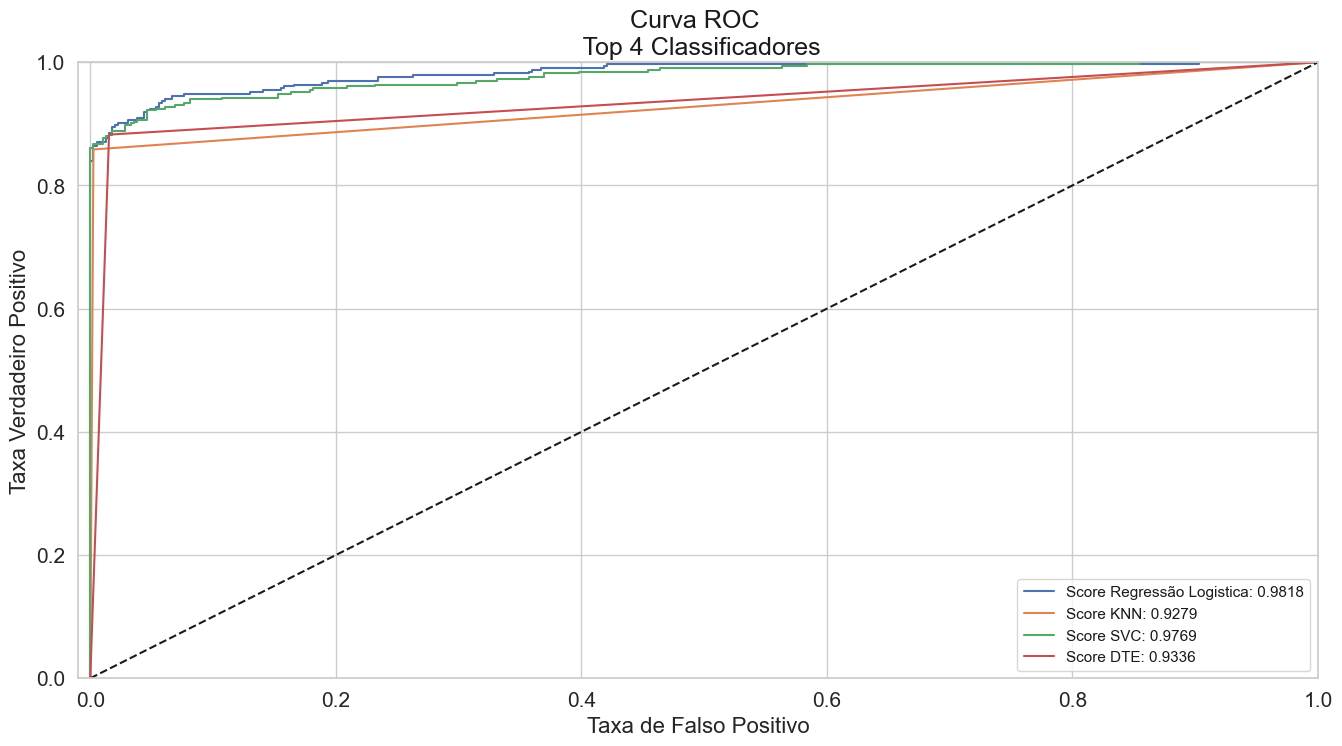

In [62]:
# Calculando cruva roc
log_fpr, log_tpr, log_thresold = roc_curve(Y_treino, previsao_reg_log)
knear_fpr, knear_tpr, knear_threshold = roc_curve(Y_treino, previsao_knn)
svc_fpr, svc_tpr, svc_threshold = roc_curve(Y_treino, previsao_svc)
tree_fpr, tree_tpr, tree_threshold = roc_curve(Y_treino, previsao_dtc)

# Criando função curva roc
def graph_roc_curve_multiple(log_fpr, 
                             log_tpr, 
                             knear_fpr, 
                             knear_tpr, 
                             svc_fpr, 
                             svc_tpr, 
                             tree_fpr, 
                             tree_tpr):
    
    plt.figure(figsize=(16,8))
    plt.title('Curva ROC \n Top 4 Classificadores', fontsize=18)
    plt.plot(log_fpr, log_tpr, label='Score Regressão Logistica: {:.4f}'.format(roc_auc_score(Y_treino, previsao_reg_log)))
    plt.plot(knear_fpr, knear_tpr, label='Score KNN: {:.4f}'.format(roc_auc_score(Y_treino, previsao_knn)))
    plt.plot(svc_fpr, svc_tpr, label='Score SVC: {:.4f}'.format(roc_auc_score(Y_treino, previsao_svc)))
    plt.plot(tree_fpr, tree_tpr, label='Score DTE: {:.4f}'.format(roc_auc_score(Y_treino, previsao_dtc)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('Taxa de Falso Positivo', fontsize=16)
    plt.ylabel('Taxa Verdadeiro Positivo', fontsize=16)
    plt.legend()
    
# Visualiznado curva roc
graph_roc_curve_multiple(log_fpr, 
                         log_tpr, 
                         knear_fpr, 
                         knear_tpr, 
                         svc_fpr, 
                         svc_tpr, 
                         tree_fpr, 
                         tree_tpr)

Após uma análise detalhada da curva de aprendizado, é evidente que a regressão logística se destaca mais uma vez como o modelo líder. Sua curva de aprendizado demonstra uma tendência de alcançar uma acurácia praticamente máxima à medida que a quantidade de dados de treinamento aumenta.

A consistência desse desempenho quase máximo reforça a confiabilidade e a eficácia da regressão logística na tarefa de classificação das transações. Essa análise confirma, mais uma vez, a superioridade desse modelo em relação aos demais testados, destacando-o como a escolha preferencial para a detecção de transações fraudulentas.

In [63]:
# Validação cruzada
precision_log, recall_log, threshold_log = precision_recall_curve(Y_treino, previsao_reg_log)
precision_svc, recall_svc, threshold_svc = precision_recall_curve(Y_treino, previsao_svc)

# Previsçao modelo
Y_pred_log = log_reg.predict(X_treino)
Y_pred_svc = svc.predict(X_treino)

# Score modelo
print('Regressão Logistica:')
print('Overfitting: \n')
print('Recall Score: {:.2f}'.format(recall_score(Y_treino, Y_pred_log)))
print('Precision Score: {:.2f}'.format(precision_score(Y_treino, Y_pred_log)))
print('F1 Score: {:.2f}'.format(f1_score(Y_treino, Y_pred_log)))
print('Accuracy Score: {:.2f}'.format(accuracy_score(Y_treino, Y_pred_log)))
print('-' * 100)
print('SVC')
print('Recall Score: {:.2f}'.format(recall_score(Y_treino, Y_pred_svc)))
print('Precision Score: {:.2f}'.format(precision_score(Y_treino, Y_pred_svc)))
print('F1 Score: {:.2f}'.format(f1_score(Y_treino, Y_pred_svc)))
print('Accuracy Score: {:.2f}'.format(accuracy_score(Y_treino, Y_pred_svc)))

Regressão Logistica:
Overfitting: 

Recall Score: 0.92
Precision Score: 0.94
F1 Score: 0.93
Accuracy Score: 0.94
----------------------------------------------------------------------------------------------------
SVC
Recall Score: 0.92
Precision Score: 0.98
F1 Score: 0.95
Accuracy Score: 0.96


Pela métrica de recall, é perceptível que a regressão logística se destaca, evidenciando sua capacidade superior na identificação das transações fraudulentas. Entretanto, ao considerarmos outras métricas, observamos que o SVC demonstra um desempenho superior em relação às demais métricas de avaliação.

Diante disso, buscaremos agora aplicar a técnica SMOTE, que tem como objetivo equilibrar a amostra, criando pontos sintéticos para a classe minoritária. O SMOTE opera utilizando a distância entre os vizinhos mais próximos da classe minoritária, gerando pontos sintéticos ao longo dessas distâncias. Esta abordagem tende a oferecer uma acurácia aprimorada em comparação com a subamostragem, embora o treinamento do modelo possa demandar mais tempo devido à criação dos pontos sintéticos

In [64]:
%%time

# Importando biblioteca
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, RandomizedSearchCV

# Modelo
lista_acuracia = []
lista_precisao = []
lista_recall = []
lista_f1 = []
lista_auc = []

# Modelo regressão logistica
log_reg_sm = LogisticRegression()
log_reg_params = {"penalty": ['l1', 'l2'], 
                  'C': [0.001, 
                        0.01, 
                        0.1, 
                        1, 
                        10, 
                        100, 
                        1000]}

# Modelo
rand_log_reg = RandomizedSearchCV(log_reg_sm, 
                                  log_reg_params, 
                                  n_iter=4)

# Treinamento modelo
for treino, teste in stratified_k_fold.split(X_treino, Y_treino):
    pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), rand_log_reg)
    modelo = pipeline.fit(X_treino[treino], Y_treino[treino])
    best_est = rand_log_reg.best_estimator_
    previsao = best_est.predict(X_treino[teste])

    lista_acuracia.append(pipeline.score(X_treino[teste], Y_treino[teste]))
    lista_precisao.append(precision_score(Y_treino[teste], previsao))
    lista_recall.append(recall_score(Y_treino[teste], previsao))
    lista_f1.append(f1_score(Y_treino[teste], previsao))
    lista_auc.append(roc_auc_score(Y_treino[teste], previsao))
    
print("Acuracia: {}".format(np.mean(lista_acuracia)))
print("Precisao: {}".format(np.mean(lista_precisao)))
print("Recall: {}".format(np.mean(lista_recall)))
print("F1: {}".format(np.mean(lista_f1)))

Acuracia: 0.9309003831417625
Precisao: 0.9286908304377469
Recall: 0.9217548620533694
F1: 0.9246913763053024
CPU times: total: 266 ms
Wall time: 2.27 s


Esses novos resultados evidenciam de forma clara e convincente que o modelo de regressão logística obteve um desempenho consideravelmente aprimorado após a aplicação da técnica SMOTE. Essa melhoria é indicada pelos resultados das métricas de avaliação, demonstrando uma performance mais robusta e precisa na detecção de transações fraudulentas.

Essa significativa melhoria no desempenho da regressão logística reforça a eficácia da técnica SMOTE na criação de uma amostra balanceada, permitindo que o modelo capture de forma mais eficiente os padrões presentes nos dados e, consequentemente, melhore sua capacidade de identificar corretamente transações fraudulentas

## 2.4) Hiperparametro com Randomized Search CV

In [65]:
# Criando lista vazia
lista_acuracia = []
lista_precisao = []
lista_recall = []
lista_f1 = []
lista_auc = []

# Modelo SVC
svc_sm = SVC()
svc_params = {'C': [0.5, 
                    0.7, 
                    0.9, 
                    1], 
              'kernel': ['rbf', 
                         'poly', 
                         'sigmoid', 
                         'linear']}

# Criando modelo
rand_svc = RandomizedSearchCV(svc_sm, svc_params, n_iter=4)

# Validação cruzada modelo
for treino, teste in stratified_k_fold.split(X_treino, Y_treino):
    pipeline_svc = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), rand_svc)
    modelo_svc = pipeline_svc.fit(X_treino[treino], Y_treino[treino])
    best_est_svc = rand_svc.best_estimator_
    previsao_svc = best_est_svc.predict(X_treino[teste])

    lista_acuracia.append(pipeline_svc.score(X_treino[teste], Y_treino[teste]))
    lista_precisao.append(precision_score(Y_treino[teste], previsao_svc))
    lista_recall.append(recall_score(Y_treino[teste], previsao_svc))
    lista_f1.append(f1_score(Y_treino[teste], previsao_svc))
    lista_auc.append(roc_auc_score(Y_treino[teste], previsao_svc))

# Visualizando score modelos
print("Acuracia: {}".format(np.mean(lista_acuracia)))
print("Precisao: {}".format(np.mean(lista_precisao)))
print("Recall: {}".format(np.mean(lista_recall)))
print("F1: {}".format(np.mean(lista_f1)))

Acuracia: 0.9268007662835249
Precisao: 0.9578924405310861
Recall: 0.8796924468566261
F1: 0.9166386914660478


Após a aplicação da técnica SMOTE, notamos uma melhoria considerável no desempenho do modelo SVC, embora ainda mantenha uma acurácia abaixo da regressão logística. Essa melhoria sugere que a técnica de balanceamento de amostra teve um impacto positivo no desempenho do SVC, permitindo uma melhor capacidade de classificação das transações fraudulentas em comparação com o modelo original.

Embora a regressão logística ainda mantenha uma performance superior, os avanços observados no desempenho do SVC corroboram a eficácia da técnica SMOTE em aprimorar a capacidade de diferentes modelos de machine learning na detecção de fraudes

# 3.0) Resultado Final

In [66]:
# classification report
labels = ['Sem Fraude', 'Com Fraude']
previsao_smote = best_est.predict(X_teste)
print(classification_report(Y_teste, previsao_smote, target_names=labels))

              precision    recall  f1-score   support

  Sem Fraude       0.90      0.90      0.90        98
  Com Fraude       0.88      0.88      0.88        84

    accuracy                           0.89       182
   macro avg       0.89      0.89      0.89       182
weighted avg       0.89      0.89      0.89       182



In [67]:
# Precision recall
Y_score = best_est.decision_function(X_teste)
precisao_media = average_precision_score(Y_teste, Y_score)
print('Score Medio precision-recall: {0:0.2f}'.format(precisao_media))

Score Medio precision-recall: 0.97


Text(0.5, 1.0, 'Curva Precisao-Recall Superamostra: \n Score Medio Precision-Recall Score =0.97')

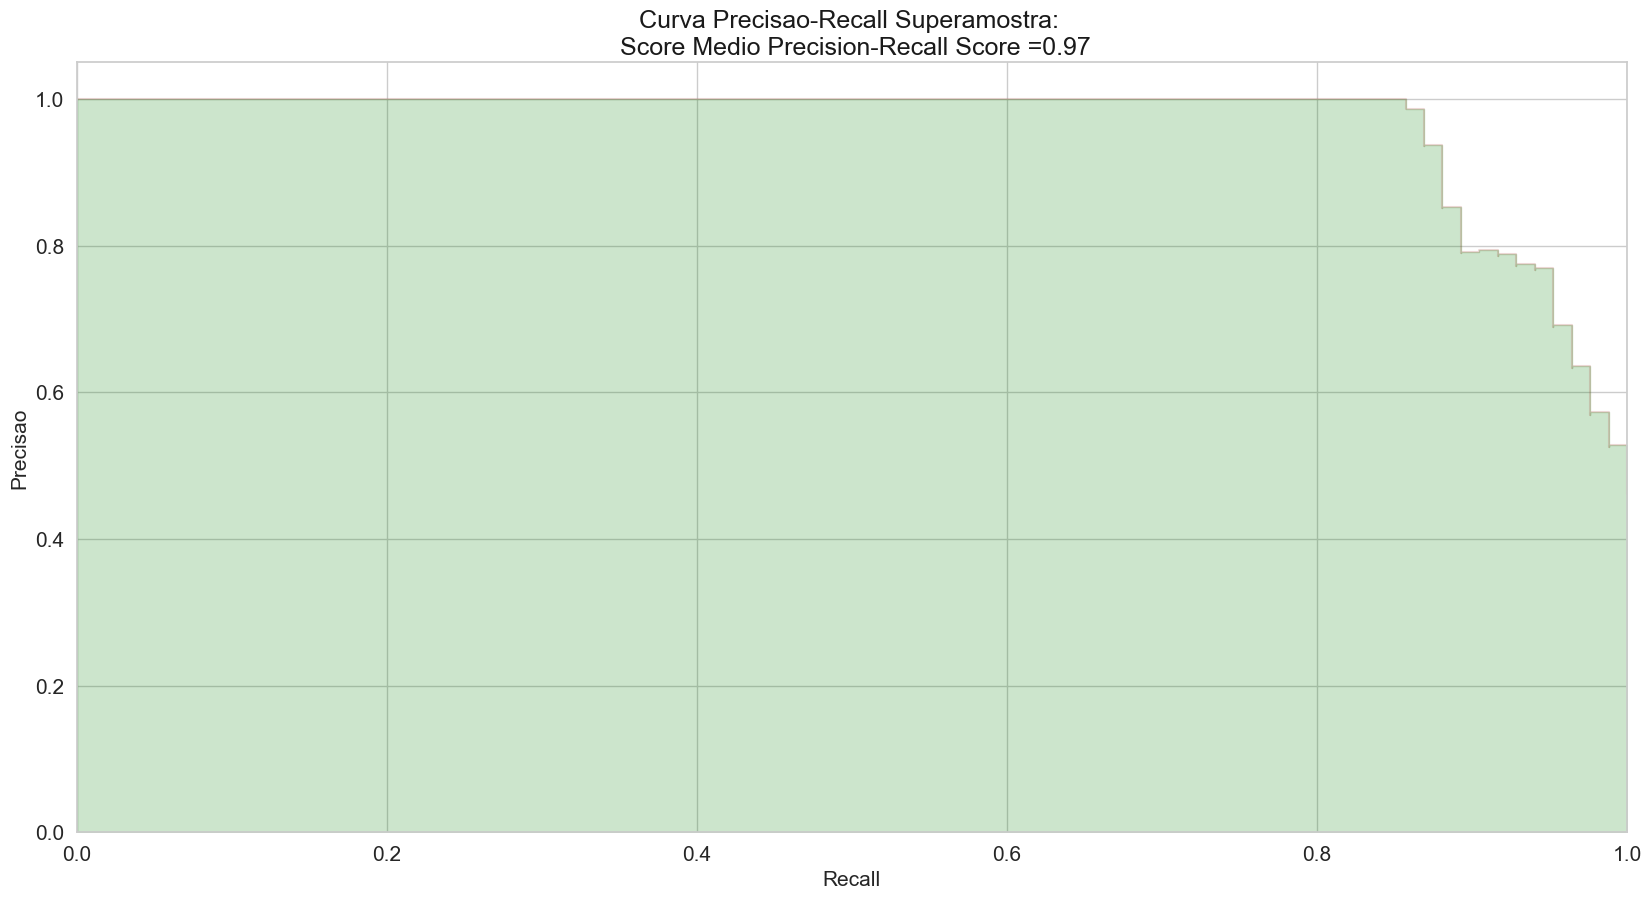

In [68]:
# Curva precision-recall
precision, recall, _ = precision_recall_curve(Y_teste, Y_score)

plt.step(recall, precision, color='r', alpha=0.2,where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,color='green')

plt.xlabel('Recall')
plt.ylabel('Precisao')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Curva Precisao-Recall Superamostra: \n Score Medio Precision-Recall Score ={0:0.2f}'.format(precisao_media), fontsize=18)

## 3.2) Modelo SMOTE

In [69]:
# Viusalizando modelo SMOTE
sm = SMOTE(sampling_strategy='minority', 
           random_state=42)

# Visualizando modelo
sm

SMOTE(random_state=42, sampling_strategy='minority')

In [70]:
from imblearn.over_sampling import SMOTE

# Crie uma instância da classe SMOTE
sm = SMOTE()

# Use o método fit_resample
Xsmote_treino, Ysmote_treino = sm.fit_resample(X_treino, Y_treino)

In [71]:
# Parametro do modelo
log_reg_sm = grid_log_reg.best_estimator_

In [72]:
# Treinamento modelo
log_reg_sm.fit(Xsmote_treino, Ysmote_treino)

LogisticRegression(C=0.1)

## 3.3) Confusion matrix

O que é confusion matrix ?
Confusion matrix (matriz de confusão) é uma tabela que descreve o desempenho de um modelo de classificação, fornecendo uma visão detalhada das previsões feitas pelo modelo em comparação com as classes reais do conjunto de dados. A matriz de confusão tem dimensões KxK, onde K representa o número de classes no problema de classificação. Cada célula da matriz de confusão fornece informações sobre a contagem ou frequência das instâncias classificadas em uma classe verdadeira (linha) em relação à classe prevista (coluna). Aqui estão os elementos principais de uma matriz de confusão:

Verdadeiro Positivo (True Positive, TP): O número de instâncias que foram corretamente classificadas como positivas para a classe verdadeira.

Falso Positivo (False Positive, FP): O número de instâncias que foram incorretamente classificadas como positivas para a classe verdadeira. Também é conhecido como erro do Tipo I.

Verdadeiro Negativo (True Negative, TN): O número de instâncias que foram corretamente classificadas como negativas para a classe verdadeira.

Falso Negativo (False Negative, FN): O número de instâncias que foram incorretamente classificadas como negativas para a classe verdadeira. Também é conhecido como erro do Tipo II.

A matriz de confusão permite visualizar facilmente os erros de classificação feitos pelo modelo. Ela fornece uma visão geral dos resultados do modelo, destacando as áreas em que o modelo está acertando e errando em relação a cada classe. Com base na matriz de confusão, várias métricas de desempenho podem ser calculadas, incluindo precisão (precision), recall (revocação), F1-score e acurácia. Essas métricas podem ajudar a avaliar o desempenho global do modelo e entender sua capacidade de fazer previsões corretas para diferentes classes.

A matriz de confusão é uma ferramenta importante para avaliar e diagnosticar o desempenho do modelo de classificação, especialmente em problemas multiclasse ou quando há desequilíbrio nas classes do conjunto de dados. Ela oferece informações mais detalhadas do que a acurácia sozinha, permitindo uma análise mais precisa das previsões do modelo e identificação de áreas para melhoria.

In [73]:
# Importando biblioteca
from sklearn.metrics import confusion_matrix

# Previsão modelo
Y_pred_log_reg = log_reg_sm.predict(X_teste)
Y_pred_knear = knears_neighbors.predict(X_teste)
Y_pred_svc = svc.predict(X_teste)
Y_pred_tree = tree_clf.predict(X_teste)

# Confusion matrix
cm_log_reg = confusion_matrix(Y_teste, Y_pred_log_reg)
cm_kneighbors = confusion_matrix(Y_teste, Y_pred_knear)
cm_svc = confusion_matrix(Y_teste, Y_pred_svc)
cm_tree = confusion_matrix(Y_teste, Y_pred_tree)

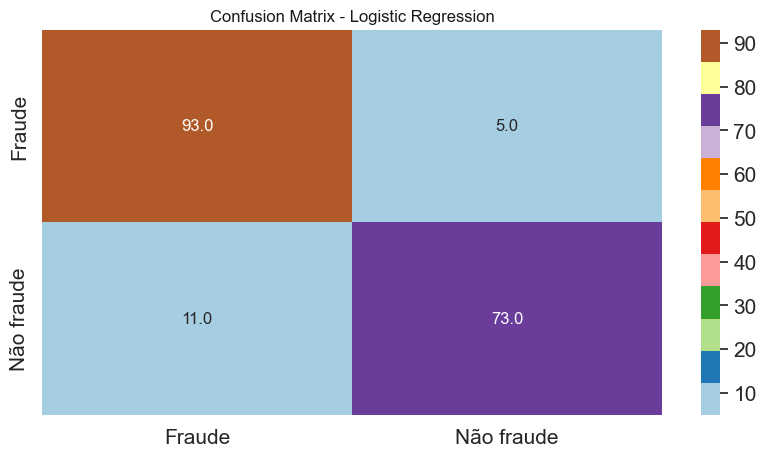

In [74]:
# Plot matrix

plt.figure(figsize=(10, 5))
ax = plt.subplot()
sns.heatmap(cm_log_reg, annot=True, ax = ax, fmt = ".1f", cmap="Paired"); 
ax.set_title('Confusion Matrix - Logistic Regression'); 
ax.xaxis.set_ticklabels(["Fraude", "Não fraude"]); ax.yaxis.set_ticklabels(["Fraude", "Não fraude"]);

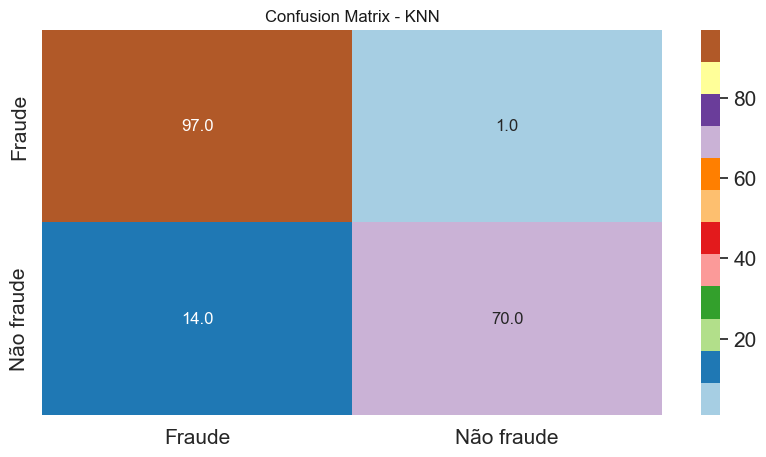

In [75]:
plt.figure(figsize=(10, 5))
ax = plt.subplot()
sns.heatmap(cm_kneighbors, annot=True, ax = ax, fmt = ".1f", cmap="Paired"); 
ax.set_title('Confusion Matrix - KNN'); 
ax.xaxis.set_ticklabels(["Fraude", "Não fraude"]); ax.yaxis.set_ticklabels(["Fraude", "Não fraude"]);

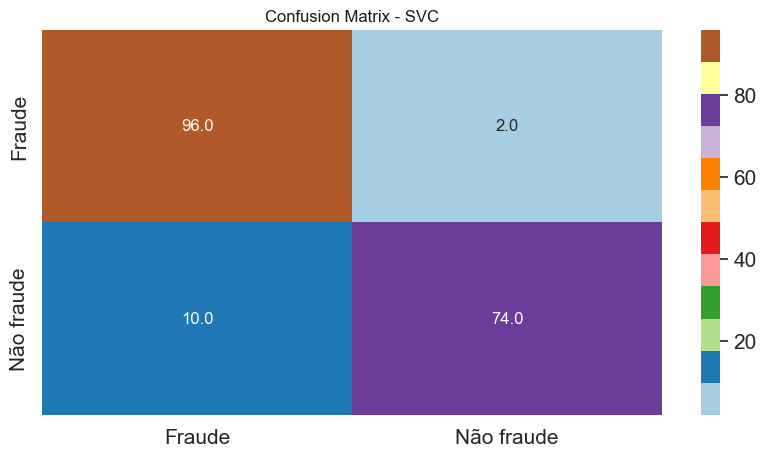

In [76]:
plt.figure(figsize=(10, 5))
ax = plt.subplot()
sns.heatmap(cm_svc, annot=True, ax = ax, fmt = ".1f", cmap="Paired"); 
ax.set_title('Confusion Matrix - SVC'); 
ax.xaxis.set_ticklabels(["Fraude", "Não fraude"]); ax.yaxis.set_ticklabels(["Fraude", "Não fraude"]);

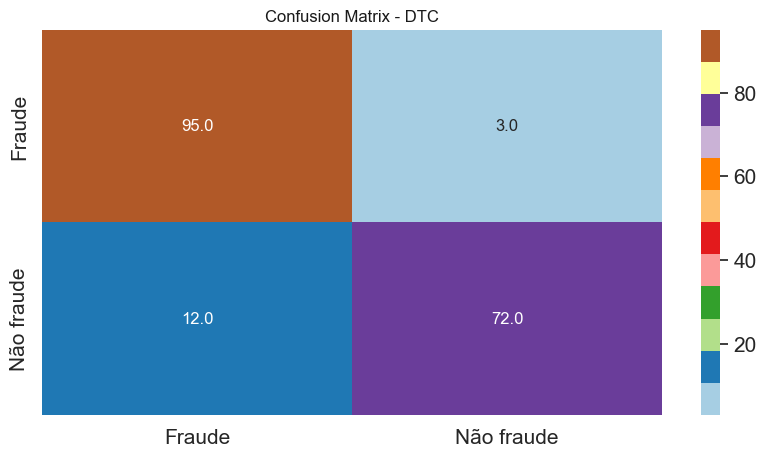

In [77]:
plt.figure(figsize=(10, 5))
ax = plt.subplot()
sns.heatmap(cm_tree, annot=True, ax = ax, fmt = ".1f", cmap="Paired"); 
ax.set_title('Confusion Matrix - DTC'); 
ax.xaxis.set_ticklabels(["Fraude", "Não fraude"]); ax.yaxis.set_ticklabels(["Fraude", "Não fraude"]);

## 3.4) classification report

In [78]:
# IMportando biblioteca classification report
from sklearn.metrics import classification_report

# classification report - Regresão Logistica
print('Regresão Logistica:')
print(classification_report(Y_teste, Y_pred_log_reg))

print('-' * 100)

# classification report - KNN
print('KNN:')
print(classification_report(Y_teste, Y_pred_knear))

print('-' * 100)

# classification report - SVC
print('SVC:')
print(classification_report(Y_teste, Y_pred_svc))

print('-' * 100)

# classification report - DTC
print('DTC:')
print(classification_report(Y_teste, Y_pred_tree))

Regresão Logistica:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92        98
           1       0.94      0.87      0.90        84

    accuracy                           0.91       182
   macro avg       0.92      0.91      0.91       182
weighted avg       0.91      0.91      0.91       182

----------------------------------------------------------------------------------------------------
KNN:
              precision    recall  f1-score   support

           0       0.87      0.99      0.93        98
           1       0.99      0.83      0.90        84

    accuracy                           0.92       182
   macro avg       0.93      0.91      0.92       182
weighted avg       0.93      0.92      0.92       182

----------------------------------------------------------------------------------------------------
SVC:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94        98
     

In [79]:
# Previsão modelo
Y_pred = log_reg.predict(X_teste)
score_subamostra = accuracy_score(Y_teste, Y_pred)

# Previsão modelo
Y_pred_sm = best_est.predict(X_teste)
score_superamostra = accuracy_score(Y_teste, Y_pred_sm)

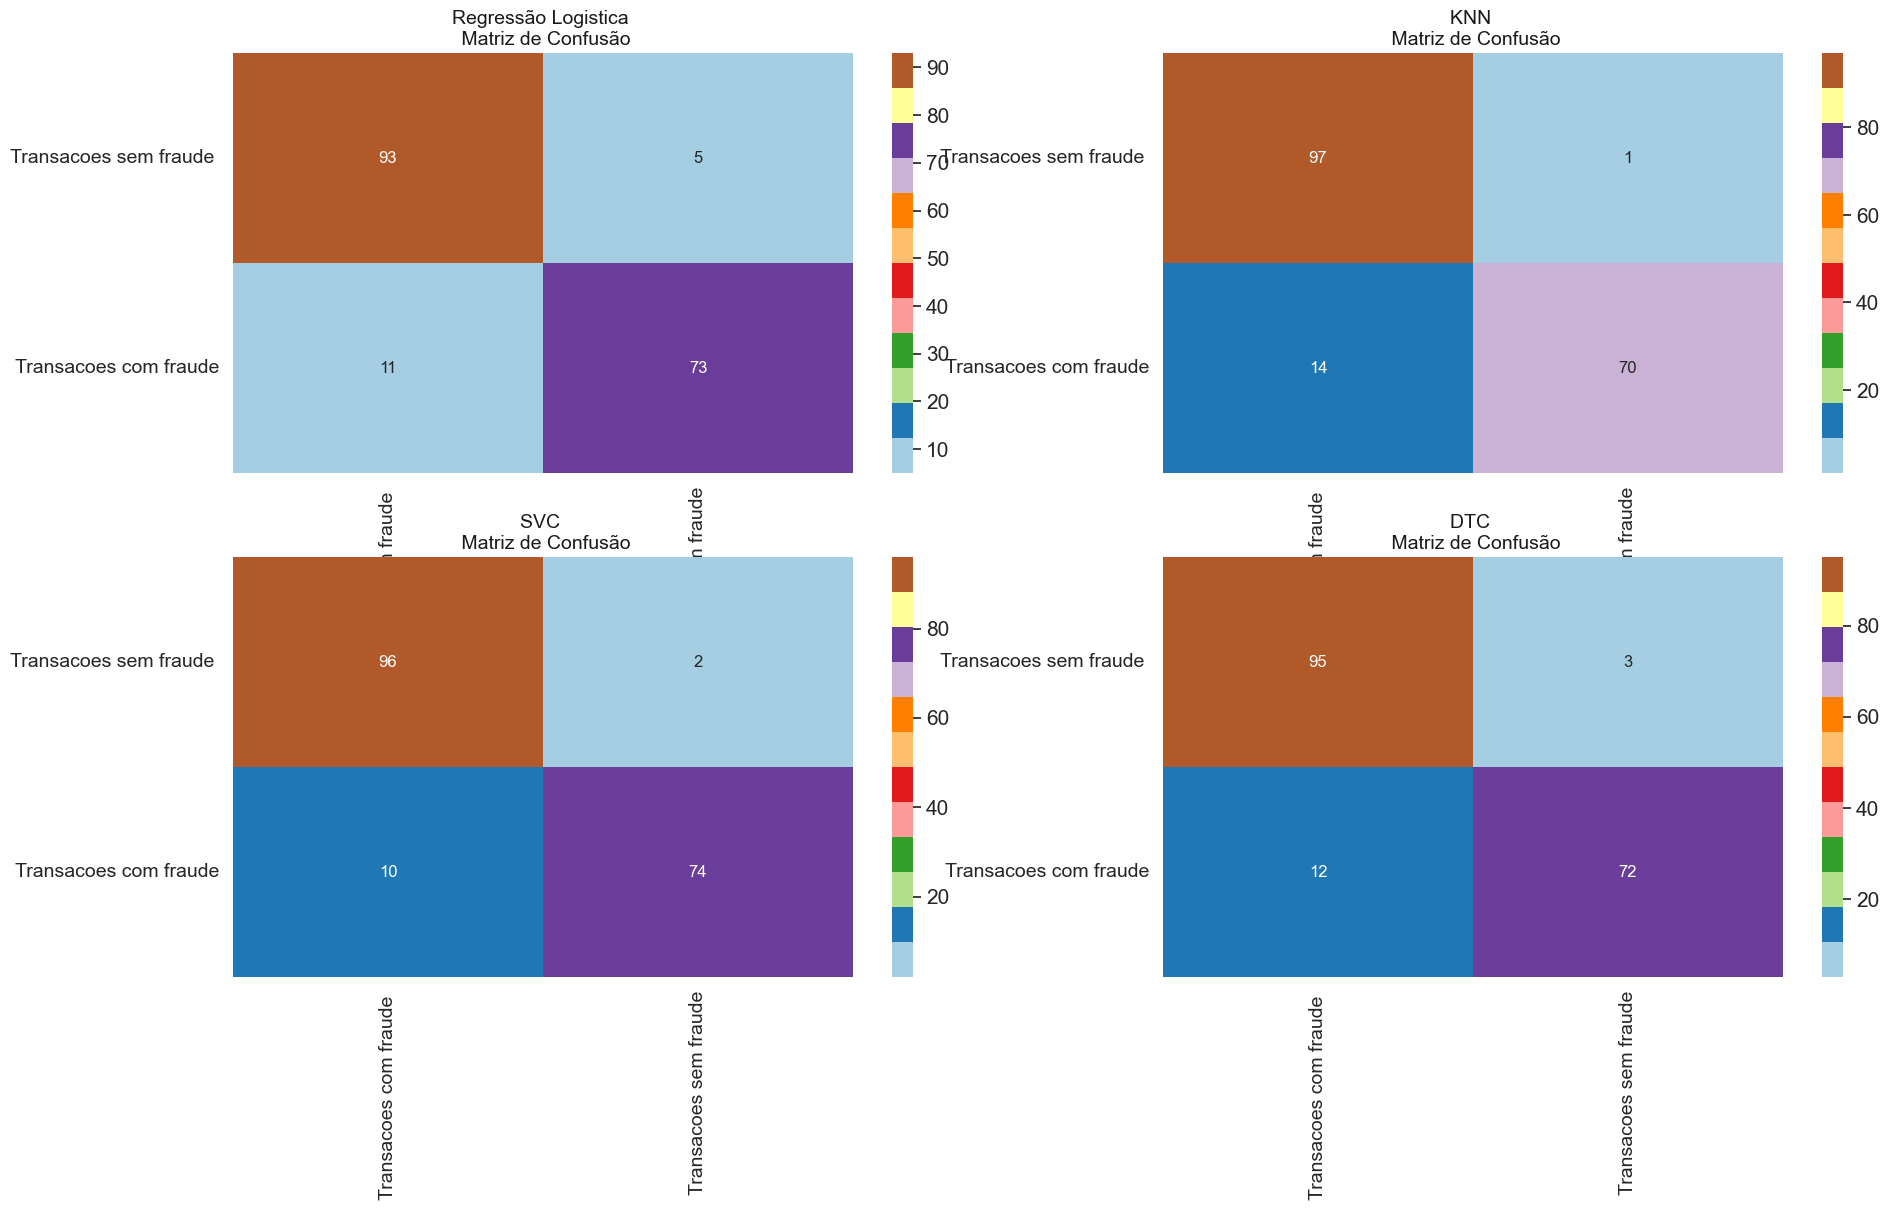

In [80]:
# Plot modelos
fig, ax = plt.subplots(2, 2, figsize=(22, 12))

sns.heatmap(cm_log_reg, ax=ax[0, 0], annot=True, cmap="Paired")
ax[0, 0].set_title("Regressão Logistica \n Matriz de Confusão", fontsize=14)
ax[0, 0].set_xticklabels(["Transacoes com fraude ", "Transacoes sem fraude"], fontsize=14, rotation=90)
ax[0, 0].set_yticklabels(["Transacoes sem fraude ", "Transacoes com fraude"], fontsize=14, rotation=0)

sns.heatmap(cm_kneighbors, ax=ax[0, 1], annot=True, cmap="Paired")
ax[0, 1].set_title("KNN \n Matriz de Confusão", fontsize=14)
ax[0, 1].set_xticklabels(["Transacoes com fraude ", "Transacoes sem fraude"], fontsize=14, rotation=90)
ax[0, 1].set_yticklabels(["Transacoes sem fraude ", "Transacoes com fraude"], fontsize=14, rotation=0)

sns.heatmap(cm_svc, ax=ax[1, 0], annot=True, cmap="Paired")
ax[1, 0].set_title("SVC \n Matriz de Confusão", fontsize=14)
ax[1, 0].set_xticklabels(["Transacoes com fraude ", "Transacoes sem fraude"], fontsize=14, rotation=90)
ax[1, 0].set_yticklabels(["Transacoes sem fraude ", "Transacoes com fraude"], fontsize=14, rotation=0)

sns.heatmap(cm_tree, ax=ax[1, 1], annot=True, cmap="Paired")
ax[1, 1].set_title("DTC \n Matriz de Confusão", fontsize=14)
ax[1, 1].set_xticklabels(["Transacoes com fraude ", "Transacoes sem fraude"], fontsize=14, rotation=90)
ax[1, 1].set_yticklabels(["Transacoes sem fraude ", "Transacoes com fraude"], fontsize=14, rotation=0)

plt.show()

## 3.5) Subamostra e Superamostra

In [81]:
#  Visualizando o score modelo
d = {'Tecnica': ['Subamostra aleatoria',
                 'Superamostra (SMOTE)'],

     'Score': [score_subamostra,
               score_superamostra]}

# Visualizando Score fraude
final_df = pd.DataFrame(data=d)
final_df

,Tecnica,Score
0,Subamostra aleatoria,0.912088
1,Superamostra (SMOTE),0.890110


## 3.6) Salvando modelo 

In [82]:
# Importando biblioteca
import joblib

# Salvar o modelo em um arquivo .pkl
joblib.dump(grid_log_reg, 'modelo_regressao_logistica.pkl')

# Modelo score
joblib.dump(sm, "Modelo SMOTE.pkl")

['Modelo SMOTE.pkl']

# Conclusão

Para identificação de fraudes por meio de um modelo de machine learning, o processo inicial envolveu a análise visual de dados para capturar insights importantes sobre as classes de fraude e não fraude, além do total de transações realizadas. Em seguida, realizou-se uma etapa de pré-processamento dos dados e a aplicação de quatro modelos de machine learning com hiperparâmetros: regressão logística, k-nearest neighbors (KNN), Support Vector Classifier (SVC) e árvore de decisão.

A análise dos resultados revelou que o modelo de regressão logística alcançou a maior acurácia dentre os modelos testados. As métricas do modelo e a curva ROC foram utilizadas para avaliar o desempenho, evidenciando um índice de fraude de 94% após a aplicação da técnica SMOTE. Mais especificamente, a matriz de confusão obtida com a Regressão Logística mostrou uma precisão de 87%, recall de 4.0%, sensibilidade de 6.0% e uma especificidade de 85.0%, resultando em uma acurácia geral de 95%. Esse resultado demonstrou um alto índice de detecção de fraudes.

# Referencia

Carlos Bonfim - "Modelo Preditivo para Detecção de Fraudes" 
- Link: https://carlos-bonfim.medium.com/modelo-preditivo-para-detec%C3%A7%C3%A3o-de-fraudes-a3ec4ce54497

Documentação oficial da biblioteca Imbalanced-learn sobre a técnica SMOTE 
- Link: https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html

Cory Maklin - "Synthetic Minority Over-sampling Technique (SMOTE)" 
- Link: https://medium.com/@corymaklin/synthetic-minority-over-sampling-technique-smote-7d419696b88c

Jason Brownlee - "SMOTE for Imbalanced Classification with Python" 
- Link: https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

Esses são os links fornecidos como referência para o modelo preditivo de detecção de fraudes e para entender melhor a técnica de sobre-amostragem SMOTE.